# ***About DataSet***

------------------------------------------------------------------------------------- "anime-dataset-2023.csv" -----------------------------------------------------------------------------------------
* anime_id: Unique ID for each anime.
* Name: The name of the anime in its original language.
* English name: The English name of the anime.
* Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).
* Score: The score or rating given to the anime.
* Genres: The genres of the anime, separated by commas.
* Synopsis: A brief description or summary of the anime's plot.
* Type: The type of the anime (e.g., TV series, movie, OVA, etc.).
* Episodes: The number of episodes in the anime.
* Aired: The dates when the anime was aired.
* Premiered: The season and year when the anime premiered.
* Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
* Producers: The production companies or producers of the anime.
* Licensors: The licensors of the anime (e.g., streaming platforms).
* Studios: The animation studios that worked on the anime.
* Source: The source material of the anime (e.g., manga, light novel, original).
* Duration: The duration of each episode.
* Rating: The age rating of the anime.
* Rank: The rank of the anime based on popularity or other criteria.
* Popularity: The popularity rank of the anime.
* Favorites: The number of times the anime was marked as a favorite by users.
* Scored By: The number of users who scored the anime.
* Members: The number of members who have added the anime to their list on the platform.
* Image URL: The URL of the anime's image or poster.

The dataset offers valuable information for analyzing and comprehending the characteristics, ratings, popularity, and viewership of various anime shows. By utilizing this dataset, one can conduct a wide range of analyses, including identifying the highest-rated anime, exploring the most popular genres, examining the distribution of ratings, and gaining insights into viewer preferences and trends. Additionally, the dataset facilitates the creation of recommendation systems, time series analysis, and clustering to delve deeper into anime trends and user behavior.


------------------------------------------------------------------------------------------ **"users-details-2023.csv"** ---------------------------------------------------------------------------------------------

*   Mal ID: Unique ID for each user.
*   Username: The username of the user.
*   Gender: The gender of the user.
*   Birthday: The birthday of the user (in ISO format).
*   Location: The location or country of the user.
*   Joined: The date when the user joined the platform (in ISO format).
*   Days Watched: The total number of days the user has spent watching anime.
*   Mean Score: The average score given by the user to the anime they have watched.
*   Watching: The number of anime currently being watched by the user.
*   Completed: The number of anime completed by the user.
*   On Hold: The number of anime on hold by the user.
*   Dropped: The number of anime dropped by the user.
*   Plan to Watch: The number of anime the user plans to watch in the future.
*   Total Entries: The total number of anime entries in the user's list.
*   Rewatched: The number of anime rewatched by the user.
*   Episodes Watched: The total number of episodes watched by the user.

The User Details Dataset provides valuable information for analyzing user behavior and preferences on the anime platform. By examining mean scores and anime genres, you can gain insights into user preferences. Users can be segmented into different groups based on their watching behavior, such as active users and casual viewers. Personalized recommendation systems can be built using users' completed and plan-to-watch lists. Location-based analysis reveals anime popularity and user engagement in various countries. Trends in watching behavior, user retention, and gender-based differences in anime preferences can be identified. Additionally, you can explore rewatching habits and perform time series analysis to understand user engagement patterns over time.

-------------------------------------------------------------------------------------------- "users-score-2023.csv" -----------------------------------------------------------------------------------------------

*  user_id: Unique ID for each user.
*  Username: The username of the user.
*  anime_id: Unique ID for each anime.
*  Anime Title: The title of the anime.
*  rating: The rating given by the user to the anime.

The User Score Dataset enables various analyses and insights into user interactions with anime. By examining user ratings for different anime titles, you can identify highly-rated and popular anime among users. Additionally, you can explore user preferences and watch patterns for specific anime titles. This dataset also forms the foundation for building recommendation systems based on user ratings, helping to suggest anime that align with individual tastes. Furthermore, you can perform collaborative filtering and similarity analysis to discover patterns of similar user interests. Overall, this dataset offers valuable information for understanding user engagement and preferences on the anime platform.

# ***Importing Libraries***

In [ ]:
!pip install tensorflow

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=f219c18df4847f64d16a4c8dceb948ad016eaf38df152fde2f360cc4e15bcd92
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install wordcloud

In [ ]:
#Reading and managing dataset
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from langdetect import detect
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Import necessary modules for collaborative filtering
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter

## Import necessary modules for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# ***Reading the DataSet***

In [ ]:
df_anime=pd.read_csv('/content/drive/MyDrive/archive/anime-dataset-2023.csv')
print('Shape of df_anime:',df_anime.shape)
pd.set_option('Display.max_columns', None)
df_anime.head()

Shape of df_anime: (24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [ ]:
df_user=pd.read_csv('/content/drive/MyDrive/archive.zip (Unzipped Files) (1)/users-details-2023.csv')
print('Shape of df_user',df_user.shape)
pd.set_option('display.max_columns', None)
df_user.head()

Shape of df_user (731290, 16)


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [ ]:
df_score=pd.read_csv('/content/drive/MyDrive/archive.zip (Unzipped Files)/users-score-2023.csv')
print('Shape of the df_score',df_score.shape)
df_score.head()

NameError: name 'pd' is not defined

# *Data Exploration*

We Start by searching for nulls to clean the DataSet

In [ ]:
df_anime.info()
df_anime.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

anime_id        False
Name            False
English name    False
Other name      False
Score           False
Genres          False
Synopsis        False
Type            False
Episodes        False
Aired           False
Premiered       False
Status          False
Producers       False
Licensors       False
Studios         False
Source          False
Duration        False
Rating          False
Rank            False
Popularity      False
Favorites       False
Scored By       False
Members         False
Image URL       False
dtype: bool

In [ ]:
df_anime.duplicated().sum()

0

Luckly the DataSet doesn't contain any nulls so let's try ordering the Animes by rank for further insights.

In [ ]:
anime_sorted_rank = df_anime.sort_values('Rank',ascending = True)[['Name','Score','Rank','Scored By','Popularity','Type','Genres','Synopsis']]
anime_sorted_rank.head(10)

,Name,Score,Rank,Scored By,Popularity,Type,Genres,Synopsis
24904,Shijuuku Nichi,UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,A music video for the song Shijuuku Nichi by S...
24500,Free Falling,UNKNOWN,0.0,UNKNOWN,0,Music,Fantasy,Music video for TOMORROW X TOGETHER's (TXT) so...
24499,A Beautiful Day,UNKNOWN,0.0,UNKNOWN,0,Music,Boys Love,Music video of the song A Beautiful Day for th...
24498,Night Flower,UNKNOWN,0.0,UNKNOWN,0,Music,Boys Love,Music video for YEEUN AHN's song Night Flower ...
24494,The Little Name,UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Music video for ADORA's song The Little Name.
24468,Ridin' (IMLAY Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,NCT DREAM 엔시티 드림 'Ridin' (IMLAY Remix)' Visual...
24464,Bad Boy (Slom Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Visualizer for Red Velvet's Bad Boy (Slom Remix).
24463,Bad Boy (nomad Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Visualizer for Red Velvet's Bad Boy (nomad Rem...
24462,맛 (Hot Sauce) (MINIMONSTER Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Visualizer for NCT DREAM's MINIMONSTER Remix.
24461,Bambi (h4rdy Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,"BAEKHYUN's ""iScreaM Vol.8 : Bambi Remixes"" is ..."


In [ ]:
Type_Counts = df_anime['Type'].value_counts()
Type_Counts.head()

TV       7597
Movie    4381
OVA      4076
ONA      3533
Music    2686
Name: Type, dtype: int64

Apparently there are 'UKNOWN' fields instead of NULLS. Another thing to highligh is Rank getting 0 value with the Combination of 'Score' and 'Scored by' having 'UNKNOWN'.So i decided to remove all the 'UNKNOWN' from the columsn and only keep the animes broadcasted on TV and movies since some of them are popular such as kimi no NA WA and movies by 'Ghibli' studio ( one of their movies won an Oscar award )

In [ ]:
df_anime = df_anime[(df_anime['Type'] == 'TV') | (df_anime['Type'] == 'Movie') ]
df_anime = df_anime[(df_anime['Score'] != 'UNKNOWN') | (df_anime['Scored By'] != 'UNKNOWN')]
df_anime
# Step 1: Identify animes with known score values and scored by in the anime table and keep animes with type 'movie' or 'TV'
valid_anime_ids = df_anime[(df_anime['Score'] != 'UNKNOWN') & (df_anime['Scored By'] != 'UNKNOWN') & (df_anime['Type'].isin(['Movie', 'TV']))]['anime_id']

# Step 2: Filter out the corresponding rows from the users table
df_score = df_score[df_score['anime_id'].isin(valid_anime_ids)]

# Step 3: Filter out the corresponding rows from the anime table
df_anime = df_anime[df_anime['anime_id'].isin(valid_anime_ids)]


In [ ]:
df_anime.shape

(6957, 24)

In [ ]:
df_score.shape

(20031107, 5)

Ready, with our somewhat cleaner dataframe we should now order calmly

In [ ]:
anime_sorted_rank = df_anime.sort_values('Rank',ascending = True)

Ok, it looks very good, right? Well look in more detail. The number 1 rank is held by Fullmetal Alchemist: Brotherhood, but... Why does it jump from rank 1 to rank 10? and then to rank 100.
If we analyze in more detail, it behaves like a String, and that is because it is. Apparently we did not realize that in the index the columns that should be numbers (rank, score, scored by) are as objects. So we will convert Score and Scored by to numbers. Rank not because we have values in 'UNKNOWN' that we will calculate by hand

In [ ]:
anime_sorted_rank.loc[:,['Score','Scored By']] = anime_sorted_rank.loc[:,['Score','Scored By']].astype(float)
anime_sorted_rank

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
3961,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),1.0,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...
6456,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,9.04,"Action, Adventure, Fantasy",Hunters devote themselves to accomplishing haz...,TV,148.0,"Oct 2, 2011 to Sep 24, 2014",fall 2011,Finished Airing,"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,10.0,10,200265,1651790.0,2656870,https://cdn.myanimelist.net/images/anime/1337/...
16184,40664,Shoujo☆Kageki Revue Starlight Movie,Revue Starlight: The Movie,劇場版 少女☆歌劇 レヴュースタァライト,8.55,UNKNOWN,With the arrival of a new generation of talent...,Movie,1.0,"Jun 4, 2021",UNKNOWN,Finished Airing,Bushiroad,Sentai Filmworks,Kinema Citrus,Original,2 hr,PG-13 - Teens 13 or older,100.0,4987,676,6475.0,16202,https://cdn.myanimelist.net/images/anime/1655/...
8776,22975,Kaibutsu-kun: Demon no Ken,UNKNOWN,怪物くん デーモンの剣,5.72,"Comedy, Horror",Based on the shounen manga by Fujiko Fujio.\n\...,Movie,1.0,"Mar 13, 1982",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Shin-Ei Animation,Unknown,55 min,G - All Ages,10004.0,15203,0,112.0,468,https://cdn.myanimelist.net/images/anime/10/59...
5267,8213,Hoka Hoka Kazoku,The Affectuous Family,ほかほか家族,5.72,Comedy,Short comedic stories about events and the dai...,TV,1428.0,"Oct 1, 1976 to Mar 31, 1982",fall 1976,Finished Airing,UNKNOWN,UNKNOWN,Eiken,Unknown,5 min per ep,G - All Ages,10005.0,13154,1,267.0,853,https://cdn.myanimelist.net/images/anime/2/212...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,8861,"Yosuga no Sora: In Solitude, Where We Are Leas...",Yosuga no Sora,"ヨスガノソラ In solitude, where we are least alone.",6.07,"Drama, Romance, Erotica","Due to a sudden accident, twins Haruka and Sor...",TV,12.0,"Oct 4, 2010 to Dec 20, 2010",fall 2010,Finished Airing,"Starchild Records, Studio Mausu, GANSIS, PRA",Media Blasters,feel.,Visual novel,25 min per ep,R+ - Mild Nudity,UNKNOWN,427,2317,255614.0,479861,https://cdn.myanimelist.net/images/anime/5/762...
2159,2360,Choujin Densetsu Urotsukidouji 2,Urotsukidoji II: Legend of the Demon Womb (movie),超神伝説うろつき童子 魔胎伝,5.84,"Fantasy, Horror, Sci-Fi, Hentai","During World War 2, the Nazis attempted to bre...",Movie,1.0,"Jul 21, 1991",UNKNOWN,Finished Airing,UNKNOWN,Central Park Media,Phoenix Entertainment,Unknown,1 hr 28 min,Rx - Hentai,UNKNOWN,8820,7,1685.0,3740,https://cdn.myanimelist.net/images/anime/4/248...
15684,39761,Saezuru Tori wa Habatakanai: The Clouds Gather,UNKNOWN,囀る鳥は羽ばたかない The clouds gather,7.41,"Boys Love, Drama, Erotica","Yashiro, the ruthlessly efficient leader of th...",Movie,1.0,"Feb 15, 2020",UNKNOWN,Finished Airing,Blue Lynx,Sentai Filmworks,GRIZZLY,Manga,1 hr 25 min,R+ - Mild Nudity,UNKNOWN,3475,305,13822.0,36217,https://cdn.myanimelist.net/images/anime/1070/...
9413,26081,Yasuji no Pornorama: Yacchimae!!,UNKNOWN,ヤスジのポルノラマ やっちまえ!!,5.17,Hentai,Based on the manga by Tanioka Yasuji.\n\nJapan...,Movie,1.0,"Sep 24, 1971",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Manga,1 hr 36 min,R+ - Mild Nudity,UNKNOWN,13148,3,227.0,856,https://cdn.myanimelist.net/images/anime/1062/...


Well now we must focus on getting the real rank of our data including all the 'UNKNOWN' for which we will use the Score Weighting formula. With this we will be able to weight the 'score' based on the number of people who have rated the anime ('score it by'). This would help balance animes with high scores but low ratings, versus those with high ratings but perhaps a slightly lower score.
Weighted Score
=
Rank
×
(
Score it by
Maximum Score it by in the dataset
)

In [ ]:
def PP (score, scoreby, maxscoreby):
    return score * (scoreby/maxscoreby)

max_score_by = anime_sorted_rank['Scored By'].max()
anime_clean_rank = anime_sorted_rank.copy()
anime_clean_rank['Rank'] = anime_clean_rank.apply(lambda row: PP(row['Score'], row['Scored By'], max_score_by), axis=1)
anime_clean_rank = anime_clean_rank.sort_values('Rank', ascending= False).reset_index(drop = True)
anime_clean_rank['Rank Number'] = range(1, len(anime_clean_rank) + 1)
anime_clean_rank = anime_clean_rank.loc[:]
anime_clean_rank.head(20)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,"Apr 7, 2013 to Sep 29, 2013",spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,"Oct 4, 2006 to Jun 27, 2007",fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.50,"Action, Comedy",The seemingly unimpressive Saitama has a rathe...,TV,12.0,"Oct 5, 2015 to Dec 21, 2015",fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.50,"Action, Award Winning, Fantasy","Ever since the death of his father, the burden...",TV,26.0,"Apr 6, 2019 to Sep 28, 2019",spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5
5,32281,Kimi no Na wa.,Your Name.,君の名は。,8.85,"Award Winning, Drama, Supernatural","Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1.0,"Aug 26, 2016",UNKNOWN,Finished Airing,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,1 hr 46 min,PG-13 - Teens 13 or older,6.010267,11,87268,1807089.0,2597495,https://cdn.myanimelist.net/images/anime/5/870...,6
6,31964,Boku no Hero Academia,My Hero Academia,僕のヒーローアカデミア,7.89,Action,"The appearance of ""quirks,"" newly discovered s...",TV,13.0,"Apr 3, 2016 to Jun 26, 2016",spring 2016,Finished Airing,"Dentsu, Mainichi Broadcasting System, Movic, T...",Funimation,Bones,Manga,24 min per ep,PG-13 - Teens 13 or older,5.864562,6,53389,1977824.0,2882333,https://cdn.myanimelist.net/images/anime/10/78...,7
7,20,Naruto,Naruto,ナルト,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",fall 2002,Finished Airing,"TV Tokyo, Aniplex, Shueisha",VIZ Media,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,5.656478,8,76343,1883772.0,2717330,https://cdn.myanimelist.net/images/anime/13/17...,8
8,25777,Shingeki no Kyojin Season 2,Attack on Titan Season 2,進撃の巨人 Season2,8.50,"Action, Drama, Suspense","For centuries, humanity has been hunted by gia...",TV,12.0,"Apr 1, 2017 to Jun 17, 2017",spring 2017,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),5.626355,12,20899,1761316.0,2566796,https://cdn.myanimelist.net/images/anime/4/841...,9
9,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,9.04,"Action, Advent

Now we are only missing something that we left out, the dates. If we review the column in detail we will see that there are different types of dates, so we will standardize them.

In [ ]:
import datetime
from datetime import date

def estandarizar_fechas(fecha):

    if " to " in fecha:
        fecha = fecha.split(" to ")[0]

    formats = ("%b %d, %Y", "%b %d %Y", "%m/%d/%Y", "%Y")

    for fmt in formats:
        try:
            return datetime.datetime.strptime(fecha, fmt).date()
        except ValueError:
            pass

    return datetime.date(1900, 1, 1)

anime_clean_rank["Aired"] = anime_clean_rank["Aired"].apply(estandarizar_fechas)
anime_clean_rank = anime_clean_rank[anime_clean_rank['Aired'] > date(1900, 1, 1)]
anime_clean_rank

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.50,"Action, Comedy",The seemingly unimpressive Saitama has a rathe...,TV,12.0,2015-10-05,fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.50,"Action, Award Winning, Fantasy","Ever since the death of his father, the burden...",TV,26.0,2019-04-06,spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,30408,Tokyo SOS,UNKNOWN,tokyoSOS,4.78,Avant Garde,The fourth anthology work by animation collect...,Movie,1.0,2011-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,11 min,G - All Ages,0.000205,16888,0,114.0,326,https://cdn.myanimelist.net/images/anime/1410/...,6953
6953,42576,Houkago Pilot,UNKNOWN,放課後（パイロット版）,4.90,Slice of Life,A bizarre depiction of after-school activities...,Movie,1.0,2008-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,2 min,PG-13 - Teens 13 or older,0.000199,18481,0,108.0,223,https://cdn.myanimelist.net/images/anime/1694/...,6954
6954,34115,Hitori de Nayamanaide Issho ni Kangaeyou,UNKNOWN,一人で悩まないで一緒に考えよう,5.07,Drama,A commercial aired at 109 Cinemas in Kawasaki ...,Movie,1.0,2013-01-01,UNKNOWN,Finished Airing,Studio RE:Map,UNKNOWN,UNKNOWN,Original,15 sec,G - All Ages,0.000198,17994,1,104.0,250,https://cdn.myanimelist.net/images/anime/5/820...,6955
6955,42272,Karasu,UNKNOWN,鴉,4.97,Avant Garde,Movie that uses a crow as a motif and Kyoto sc...,Movie,1.0,1992-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,4 min,G - All Ages,0.000192,18207,0,103.0,238,https://cdn.myanimelist.net/images/anime/1243/...,6956


Another interesting topic that we can do to better clean our data is to limit the airing dates of animes to avoid animes with a low rank or scored by because they are very old and little known. But... Where should we cut from?

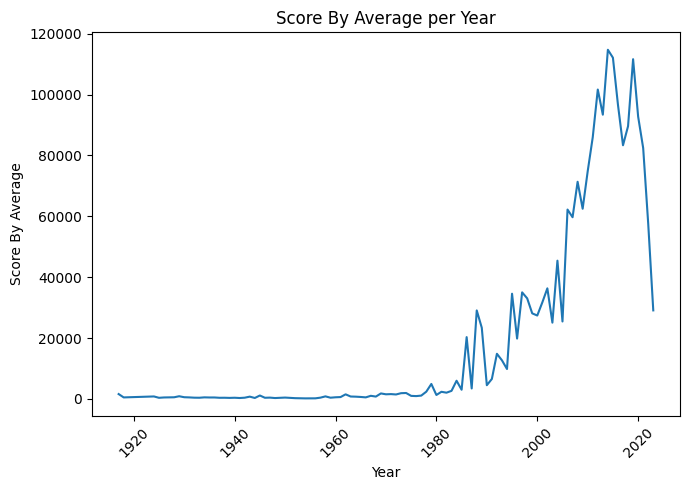

In [ ]:
anime_year_helper = anime_clean_rank.copy()
anime_year_helper['Aired'] = pd.to_datetime(anime_year_helper['Aired'])
anime_year_helper['Year'] = anime_year_helper['Aired'].dt.year
score_by_year = anime_year_helper.groupby('Year')['Scored By'].mean()
fig, ax = plt.subplots(figsize=(7, 5))
score_by_year.plot(kind='line', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Score By Average')
ax.set_title('Score By Average per Year')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see, anime from the early '80s are already starting to have a good average rating per person. So we will restrict our dataframe from that date

In [ ]:
anime_clean_rank = anime_clean_rank[anime_clean_rank['Aired'] > date(1980, 1, 1)]
anime_clean_rank

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.50,"Action, Comedy",The seemingly unimpressive Saitama has a rathe...,TV,12.0,2015-10-05,fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.50,"Action, Award Winning, Fantasy","Ever since the death of his father, the burden...",TV,26.0,2019-04-06,spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,30408,Tokyo SOS,UNKNOWN,tokyoSOS,4.78,Avant Garde,The fourth anthology work by animation collect...,Movie,1.0,2011-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,11 min,G - All Ages,0.000205,16888,0,114.0,326,https://cdn.myanimelist.net/images/anime/1410/...,6953
6953,42576,Houkago Pilot,UNKNOWN,放課後（パイロット版）,4.90,Slice of Life,A bizarre depiction of after-school activities...,Movie,1.0,2008-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,2 min,PG-13 - Teens 13 or older,0.000199,18481,0,108.0,223,https://cdn.myanimelist.net/images/anime/1694/...,6954
6954,34115,Hitori de Nayamanaide Issho ni Kangaeyou,UNKNOWN,一人で悩まないで一緒に考えよう,5.07,Drama,A commercial aired at 109 Cinemas in Kawasaki ...,Movie,1.0,2013-01-01,UNKNOWN,Finished Airing,Studio RE:Map,UNKNOWN,UNKNOWN,Original,15 sec,G - All Ages,0.000198,17994,1,104.0,250,https://cdn.myanimelist.net/images/anime/5/820...,6955
6955,42272,Karasu,UNKNOWN,鴉,4.97,Avant Garde,Movie that uses a crow as a motif and Kyoto sc...,Movie,1.0,1992-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,4 min,G - All Ages,0.000192,18207,0,103.0,238,https://cdn.myanimelist.net/images/anime/1243/...,6956


**Simple exploratory analysis**

Now we will move on to carrying out a simple analysis to find interesting data within this dataset

**Analysis of studies**

Looking at our dataset we will realize that an anime can be created by various studios, as is the case of Neon Genesis Evangeion which was animated by Gainax and Tatsunoko Production, on the other hand we also see that most animes have various genres. So for a better analysis we will destructure those columns.

In [ ]:
df_anime_expanded = anime_clean_rank.copy()

genres_expanded = df_anime_expanded["Genres"].str.get_dummies(sep=", ")
df_anime_expanded = df_anime_expanded.join(genres_expanded)
df_anime_expanded = df_anime_expanded.drop("Genres", axis=1)
df_anime_expanded = df_anime_expanded.rename(columns={'Type': 'Medio Emision'})

In [ ]:
def split_studios(x):
    return x.split(", ")
df_anime_expanded["Studios"] = df_anime_expanded["Studios"].apply(split_studios)
df_anime_expanded = df_anime_expanded.explode('Studios').reset_index(drop=True)

df_anime_expanded.head()

,anime_id,Name,English name,Other name,Score,Synopsis,Medio Emision,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,Girls Love,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1535,Death Note,Death Note,デスノート,8.62,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.50,The seemingly unimpressive Saitama has a rathe...,TV,12.0,2015-10-05,fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.50,"Ever since the death of his father, the burden...",TV,26.0,2019-04-06,spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


The Studios involved in the top 200 animes until 2023 vs. Studios involved in bottom 200 anime until 2023

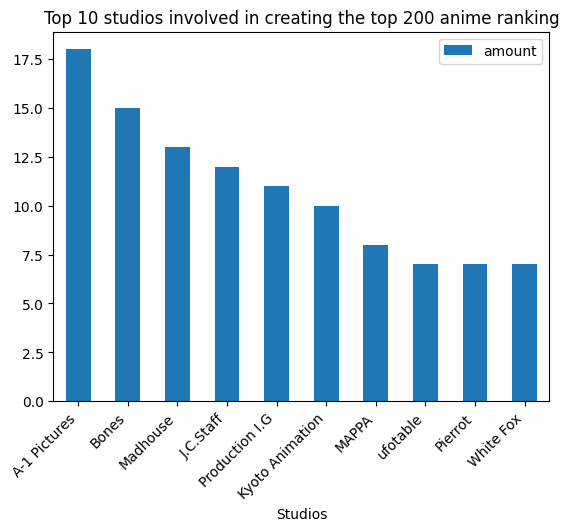

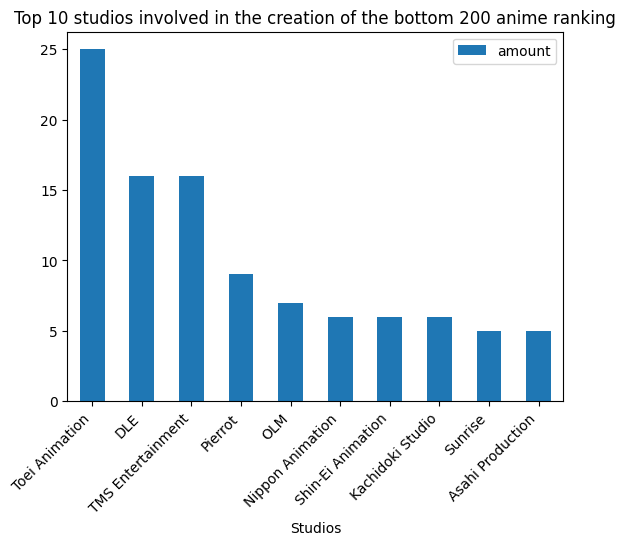

In [ ]:
muestra_top = df_anime_expanded.head(200)
top_studios = (
    muestra_top.groupby('Studios').Name.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)

muestra_bottom = (
    df_anime_expanded[df_anime_expanded['Studios'] != 'UNKNOWN']
        .sort_values('Rank Number', ascending = False)
        .head(200)
)

bottom_studios = (
    muestra_bottom.groupby('Studios').Name.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)


top_studios.plot(kind = 'bar', x = 'Studios', title='Top 10 studios involved in creating the top 200 anime ranking')
plt.xticks(rotation=45, ha='right')
bottom_studios.plot(kind = 'bar', x= 'Studios', title='Top 10 studios involved in the creation of the bottom 200 anime ranking')
plt.xticks(rotation=45, ha='right')
plt.show()

It is interesting to see the top and the bottom but participation in it does not make them the participants in the animes with the best overall scores. Since we have only measured ourselves from the 200 on each side. So for an overview we will take the average of the entire data set

<Axes: title={'center': 'Top 20 studios with the best average in animes'}, xlabel='Studios'>

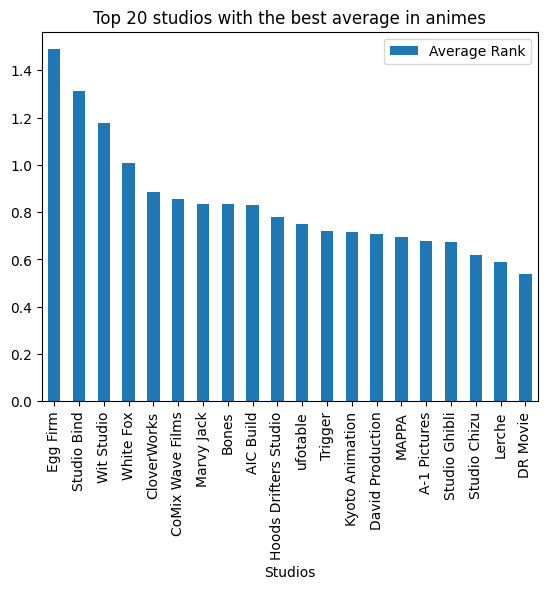

In [ ]:
best_studios = df_anime_expanded.groupby('Studios')['Rank'].mean().reset_index()
best_studios_df = best_studios.rename(columns={'Rank': 'Average Rank'}).sort_values('Average Rank',ascending = False).reset_index(drop= True)
best_studios_df
best_studios_df.head(20).plot(kind= 'bar', x= 'Studios', y= 'Average Rank', title='Top 20 studios with the best average in animes')


So being part of the top 200 anime does not give you the same ranking as the average in the entire anime dataset. This may be due to the number of animes with a considerable rating outside the top or even participation within the top 200 animes but that did not reach the top 10 studios.

In [ ]:
df_long = pd.melt(df_anime_expanded, id_vars=['Name', 'Studios', 'Rank'],
                  value_vars=['Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet',
       'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Action',
       'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports',
       'Supernatural', 'Suspense'],
                  var_name='Genre', value_name='Present')

# Filter only rows where a gender is present (assuming you use 1 or True to indicate presence)
df_long = df_long[df_long['Present'] == 1]

# Group by study and genre, and count the occurrences
genre_count_by_studio = df_long.groupby(['Studios', 'Genre']).size().reset_index(name='Count')

top_genres_by_studio = genre_count_by_studio.groupby('Studios').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

top_genres_by_studio

,Studios,Genre,Count
0,10Gauge,Slice of Life,1
1,10Gauge,Sports,1
2,8bit,Action,18
3,8bit,Comedy,13
4,8bit,Fantasy,13
...,...,...,...
1257,ufotable,Action,29
1258,ufotable,Fantasy,18
1259,ufotable,Supernatural,15
1260,yell,Action,1


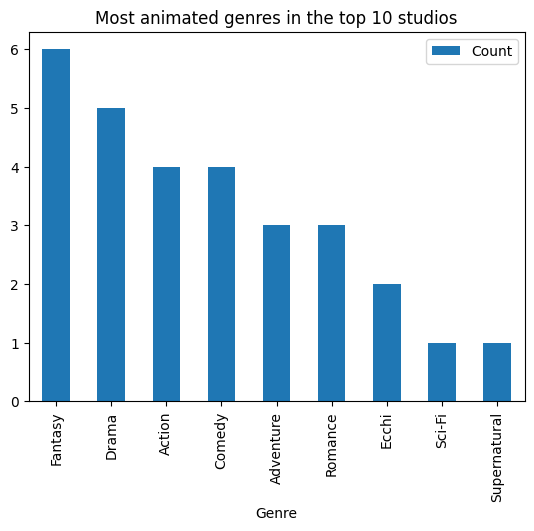

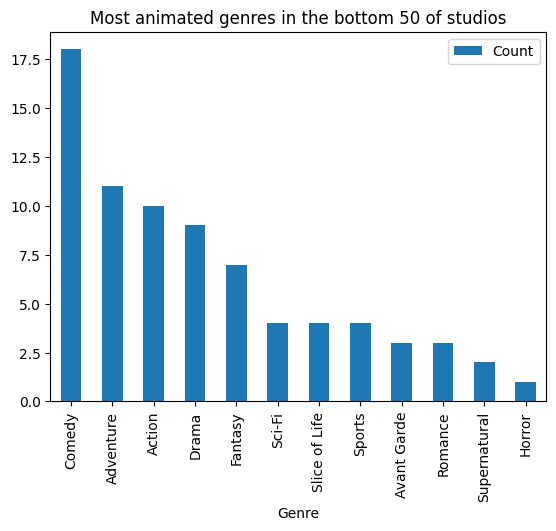

In [ ]:
top_studios_animes = best_studios_df.head(10).loc[:,'Studios'].tolist()
bottom_studios_animes = best_studios_df.sort_values('Average Rank', ascending = True).head(50).loc[:,'Studios'].tolist()

top_gen_of_top = top_genres_by_studio[top_genres_by_studio['Studios'].isin(top_studios_animes)]
top_gen_of_bottom = top_genres_by_studio[top_genres_by_studio['Studios'].isin(bottom_studios_animes)]

top_to_graph = top_gen_of_top.groupby('Genre')['Count'].count().reset_index().sort_values('Count',ascending = False)
bottom_to_graph = top_gen_of_bottom.groupby('Genre')['Count'].count().reset_index().sort_values('Count',ascending = False)
top_to_graph.plot(kind='bar',x='Genre', y= 'Count', title='Most animated genres in the top 10 studios')
bottom_to_graph.plot(kind='bar',x='Genre', y= 'Count', title='Most animated genres in the bottom 50 of studios')
plt.show()

Apparently the studios in the top 10 are characterized by animating Fantasy, Drama and Action type animes. While the animes in the bottom 50 focused more on Comedy, Adventure and Action
To finish, we will see the distribution of genres in animes.

In [ ]:
df_anime_only = df_anime_expanded.drop_duplicates(subset='Name', keep='first')
df_anime_only = pd.melt(df_anime_only, id_vars=['Name', 'Studios', 'Rank'],
                  value_vars=['Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet',
       'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Action',
       'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports',
       'Supernatural', 'Suspense'],
                  var_name='Genre', value_name='Present')
df_anime_only = df_anime_only[df_anime_only['Present'] == 1]
df_anime_only = df_anime_only.groupby(['Name','Rank', 'Genre']).size().reset_index(name='Count')
df_anime_only = df_anime_only.sort_values('Rank', ascending = False).reset_index(drop = True)
df_anime_only

,Name,Rank,Genre,Count
0,Shingeki no Kyojin,8.540000,Drama,1
1,Shingeki no Kyojin,8.540000,Award Winning,1
2,Shingeki no Kyojin,8.540000,Suspense,1
3,Shingeki no Kyojin,8.540000,Action,1
4,Death Note,8.485807,Supernatural,1
...,...,...,...,...
14402,Houkago Pilot,0.000199,Slice of Life,1
14403,Hitori de Nayamanaide Issho ni Kangaeyou,0.000198,Drama,1
14404,Karasu,0.000192,Avant Garde,1
14405,Imagination of Marathon Runners,0.000192,Sports,1


<Axes: title={'center': 'Distribution of genres in all anime data'}, xlabel='Genre'>

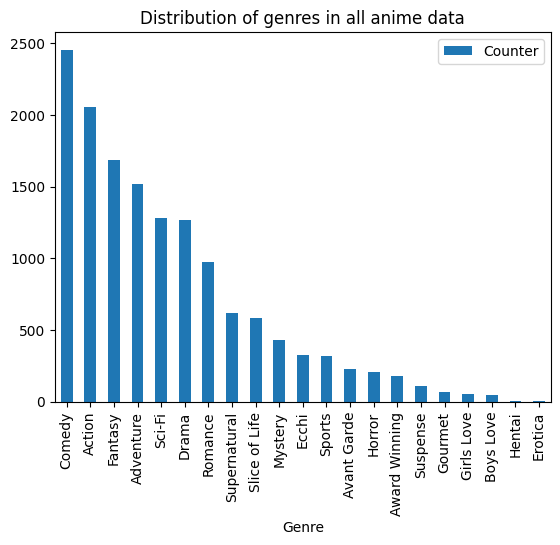

In [ ]:
df_count_genre_anime = df_anime_only.groupby('Genre')['Count'].count().reset_index(name = 'Counter')
df_count_genre_anime = df_count_genre_anime.sort_values('Counter', ascending = False)
df_count_genre_anime.plot(kind='bar', x='Genre', y = 'Counter', title= 'Distribution of genres in all anime data')

It is interesting to know that the comedy genre is the most frequent in anime, however it is not the genre that the studios with the best ranking frequently make.
Now finally we will see the genres of the top 100 animes in the ranking to see if they have a similarity with the genres in general

<Axes: title={'center': 'Genre distribution in the top 200 animes'}, xlabel='Genre'>

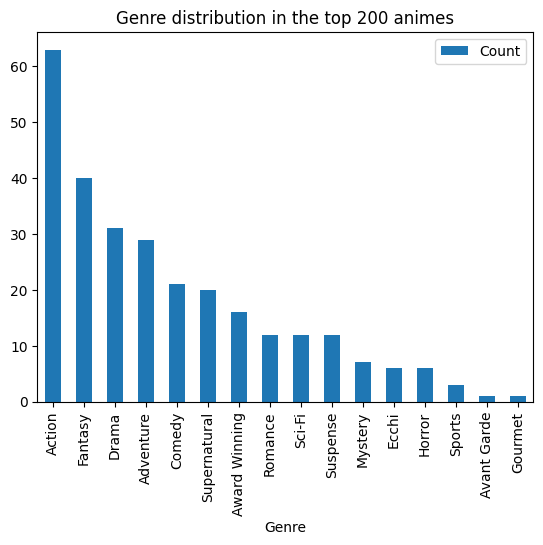

In [ ]:
top_animes = anime_clean_rank.head(100).loc[:,'Name'].tolist()
top_animes
df_top_animes = df_anime_only[df_anime_only['Name'].isin(top_animes)].drop('Count', axis=1)
df_top_animes_genre = df_top_animes.groupby('Genre').size().reset_index(name='Count').sort_values('Count', ascending = False)
df_top_animes_genre.plot(kind = 'bar', x = 'Genre', y = 'Count', title= 'Genre distribution in the top 200 animes')

Taking the graph into account we see how they have a certain similarity in action, fantasy, drama and adventure. But they have a considerable difference in terms of Comedy. Which highlights that the top 200 does not focus as much on comedy as the entire anime dataset.

In [ ]:
df_anime = anime_clean_rank

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731290 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152806 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [ ]:
df_user.duplicated().sum()

0

In [ ]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20031107 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 917.0+ MB


In [ ]:
df_score.isnull().sum()

user_id        0
Username       0
anime_id       0
Anime Title    0
rating         0
dtype: int64

In [ ]:
df_score.duplicated().sum()

0

# ***Visualization***

 ***AnimeDataset***

In [ ]:
# Convert the 'Aired' column to string type
df_anime['Aired'] = df_anime['Aired'].astype(str)

# Extract the release year from the 'Aired' column
df_anime['Release_Year'] = df_anime['Aired'].str.extract(r'(\d{4})')

# Group by release year and count the number of anime for each year
anime_cby = df_anime.groupby('Release_Year').size().reset_index(name='Anime_Count')

# Sort the result by anime count in descending order
k = anime_cby.sort_values(by='Anime_Count', ascending=False)

# Display the top 10 years with the highest number of anime
k.head(10)

,Release_Year,Anime_Count
36,2016,324
37,2017,314
38,2018,302
35,2015,286
34,2014,279
39,2019,260
41,2021,254
33,2013,253
32,2012,232
42,2022,231


**Number of Anime Released by Years**

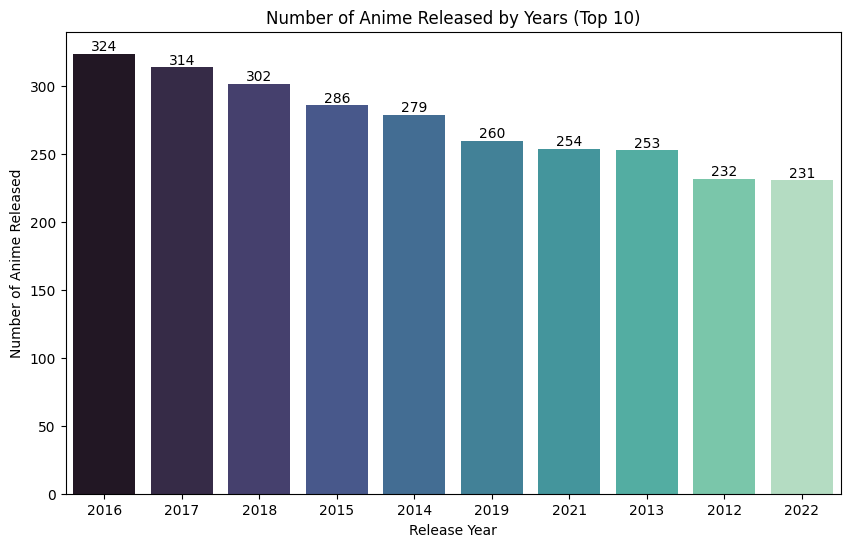

In [ ]:
top_10 = k.head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Release_Year', y='Anime_Count', hue='Release_Year', data=top_10, palette='mako', legend=False)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Anime Released')
plt.title('Number of Anime Released by Years (Top 10)')
plt.show()

**Top 10 High Ranked Animes Until 2023**

In [ ]:
name_score=anime_clean_rank[['Name','Rank Number']].sort_values(by='Rank Number',ascending=True).head(10)
name_score.head(10)

,Name,Rank Number
0,Shingeki no Kyojin,1
1,Death Note,2
2,Fullmetal Alchemist: Brotherhood,3
3,One Punch Man,4
4,Kimetsu no Yaiba,5
5,Kimi no Na wa.,6
6,Boku no Hero Academia,7
7,Naruto,8
8,Shingeki no Kyojin Season 2,9
9,Hunter x Hunter (2011),10


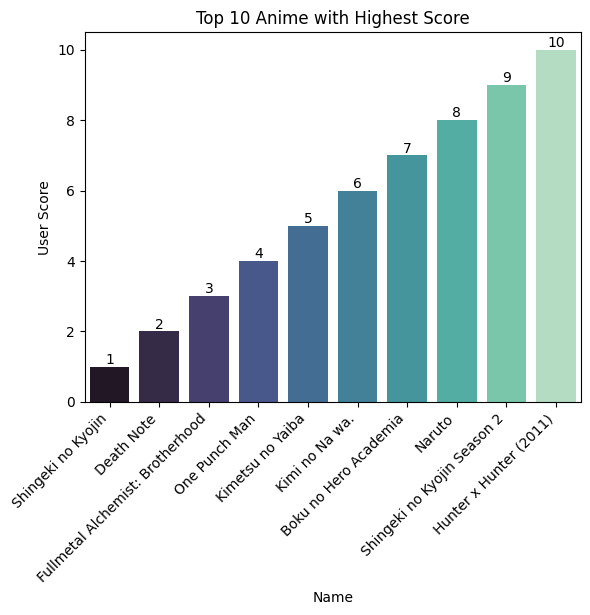

In [ ]:
ax=sns.barplot(y='Rank Number',x='Name',hue='Name',data=name_score,palette='mako',legend=False)
ax.set_title('Top 10 Anime with Highest Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('User Score')
plt.xticks(rotation=45, ha='right')
ax.title.set_text('Top 10 Anime with Highest Score')
plt.show()

**Top 10 High Rated Animes Until 2023**

In [ ]:
name_score=anime_clean_rank[['Name','Score']].sort_values(by='Score',ascending=False).head(10)
name_score.head(10)

,Name,Score
2,Fullmetal Alchemist: Brotherhood,9.10
18,Steins;Gate,9.07
414,Bleach: Sennen Kessen-hen,9.07
362,Gintama°,9.06
14,Shingeki no Kyojin Season 3 Part 2,9.05
163,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05
390,Gintama',9.04
9,Hunter x Hunter (2011),9.04
1161,Gintama: The Final,9.04
554,Gintama': Enchousen,9.03


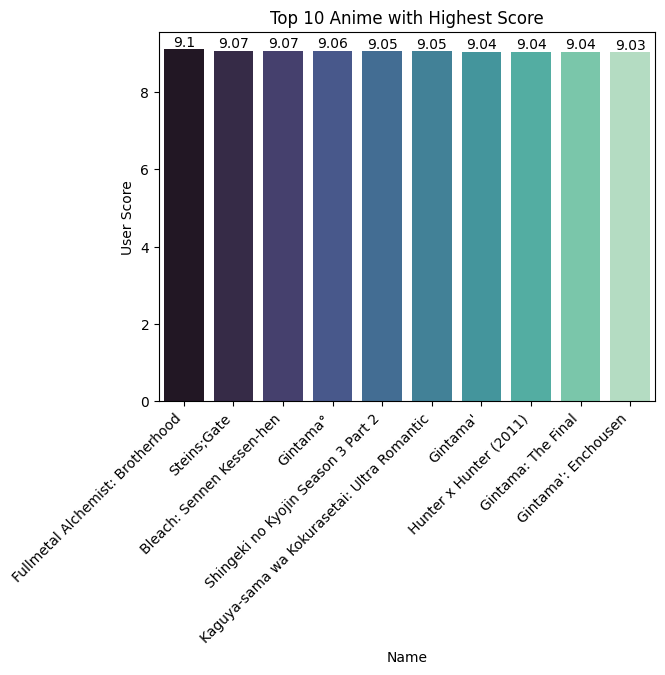

In [ ]:
ax=sns.barplot(y='Score',x='Name',hue='Name',data=name_score,palette='mako',legend=False)
ax.set_title('Top 10 Anime with Highest Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('User Score')
plt.xticks(rotation=45, ha='right')
ax.title.set_text('Top 10 Anime with Highest Score')
plt.show()

**Top 10 Low Rated Anime Until 2023**

In [ ]:
sns.set_style('whitegrid')
name_score=anime_clean_rank[['Name','Score']].sort_values(by='Score',ascending=True)
name_score.head(10)

,Name,Score
5216,Aki no Puzzle,2.37
2452,Ex-Arm,2.90
5610,Madonna (Movie),2.91
5781,Super Child,2.91
4520,Mochibei,2.99
5149,Fetish Doll,3.05
5273,Ladyspo,3.06
5345,Scrap Diary,3.14
5438,Koumon-teki Juuku Ketsujiru Juke,3.26
3586,Vampire Holmes,3.28


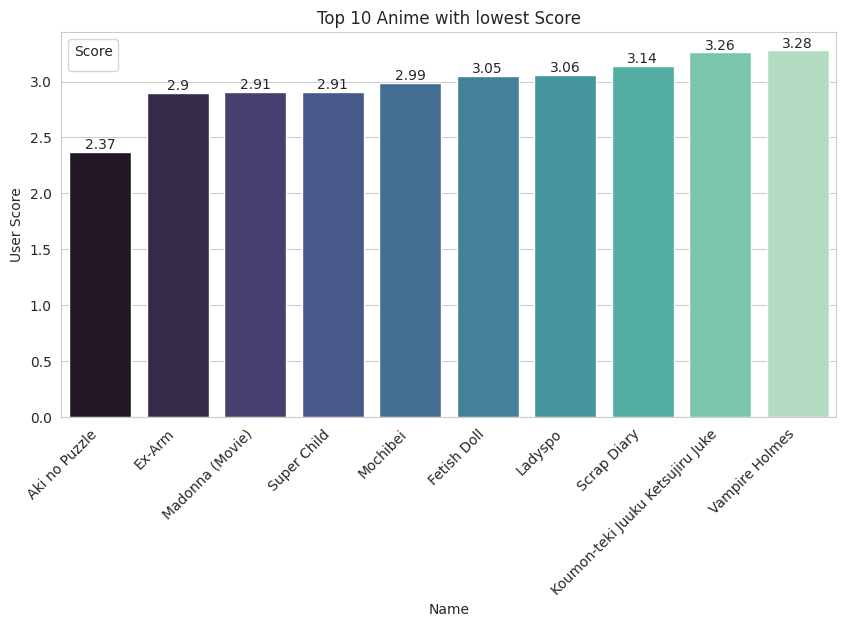

In [ ]:
sns.set_style('whitegrid')
name_score=anime_clean_rank[['Name','Score']].sort_values(by='Score',ascending=True).head(10)
plt.figure(figsize=(10,5))
ax=sns.barplot(y='Score',x='Name',hue='Name',data=name_score,palette='mako',legend=False)
ax.set_title('Top 10 Anime with lowest  Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('User Score')
plt.xticks(rotation=90)
ax.title.set_text('Top 10 Anime with lowest Score')
plt.legend(title='Score' ,loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

**Top 10 Famous Anime Until 2023(based on added to users list)**

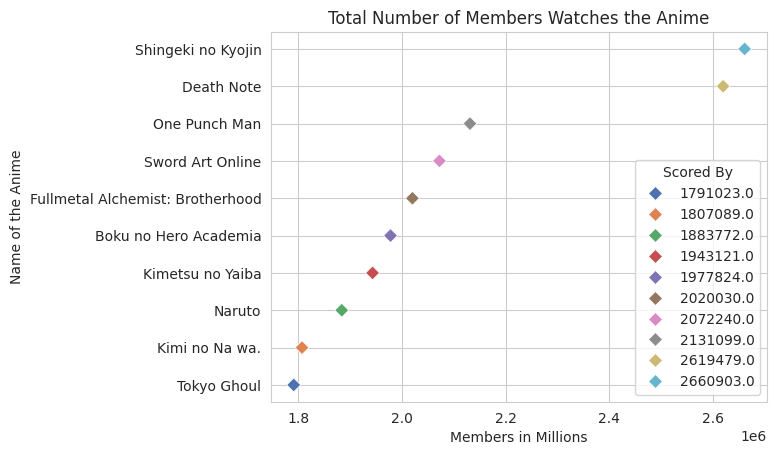

In [ ]:
famous=anime_clean_rank[['Scored By','Name']].sort_values(by='Scored By',ascending=False).head(10)
ax=sns.scatterplot(x='Scored By',y='Name',s=50,data=famous,marker='D',palette='deep',hue='Scored By')
plt.xlabel('Members in Millions')
plt.ylabel('Name of the Anime')
plt.title('Total Number of Members Watches the Anime')
plt.show()

**Count of Anime Names By Type**

In [ ]:
Type_Counts = df_anime['Type'].value_counts()
Type_Counts.head(10)

TV       4255
Movie    2059
Name: Type, dtype: int64

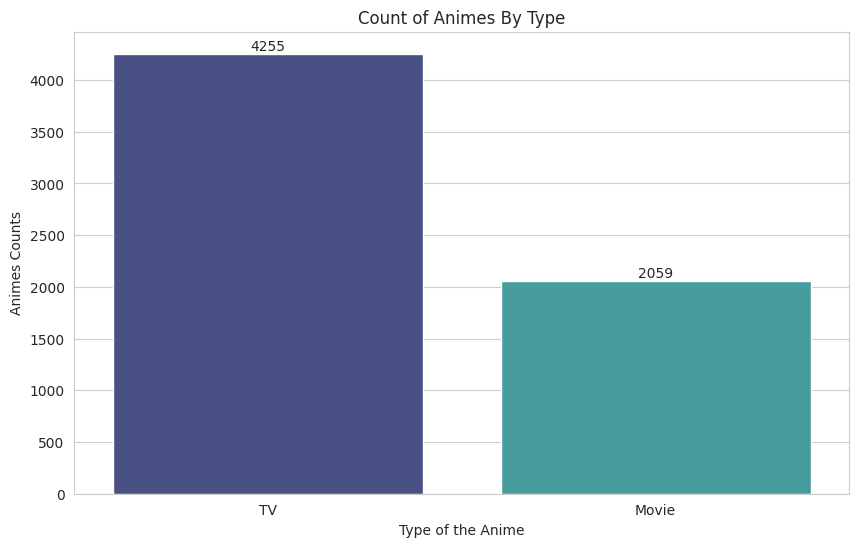

In [ ]:
# Count the number of anime titles by type
Type_Counts = df_anime['Type'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=Type_Counts.index, y=Type_Counts.values, hue=Type_Counts.index, palette='mako', legend=False)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Type of the Anime')
ax.set_ylabel('Animes Counts')
plt.title('Count of Animes By Type')
plt.show()

**Top 15 Animes By Its Community**

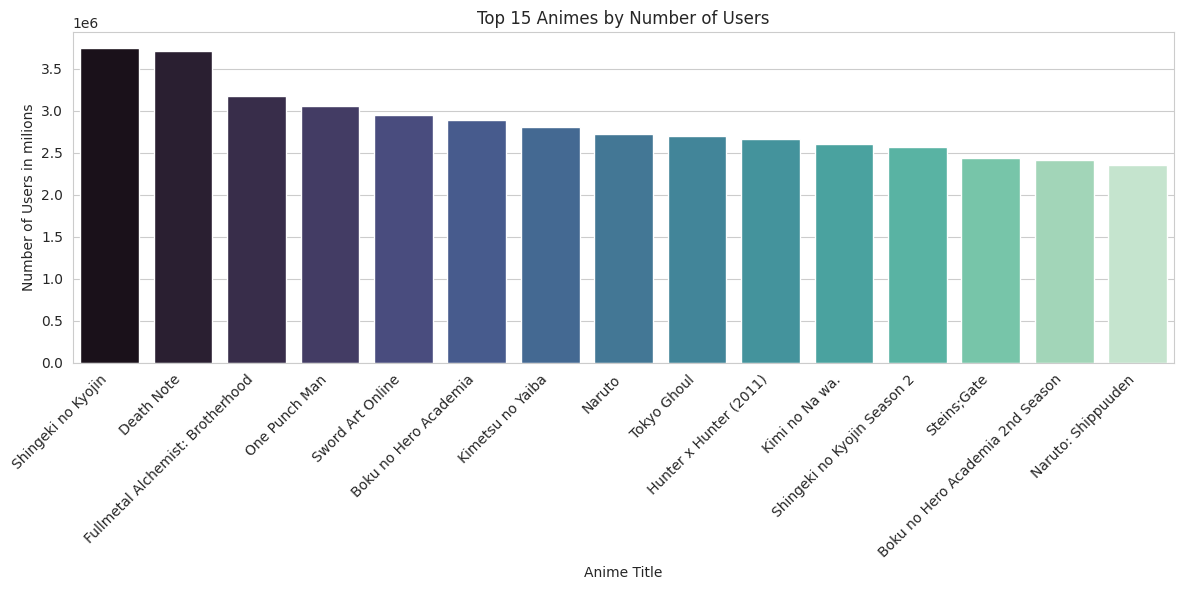

In [ ]:
top_15_scored = df_anime.sort_values(by='Members', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_scored, x='Name', y='Members',hue='Name', palette='mako',legend=False)
plt.xlabel('Anime Title')
plt.ylabel('Number of Users in milions')
plt.title('Top 15 Animes by Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Count of Animes By Genre**

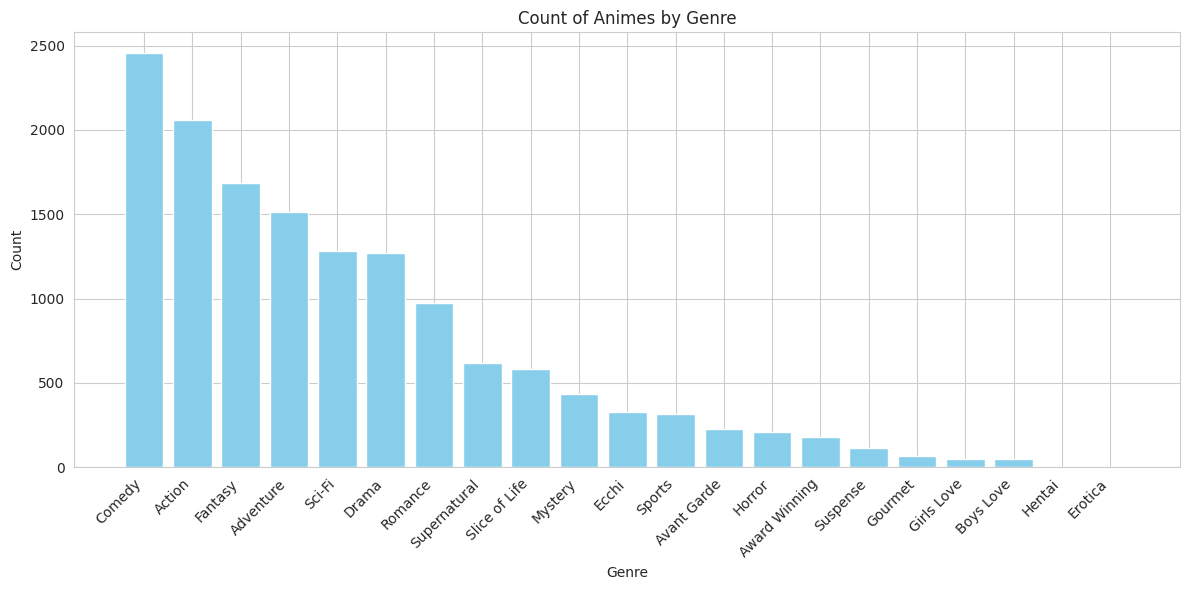

In [ ]:
# Split the genres and count their occurrences
Genre_Counts = df_anime[df_anime['Genres'] != "UNKNOWN"]['Genres'].apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 6))
plt.bar(Genre_Counts.index, Genre_Counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Animes by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 15 Most Popular Genres In The Anime Industry**

**Distribution Of Anime Genres**

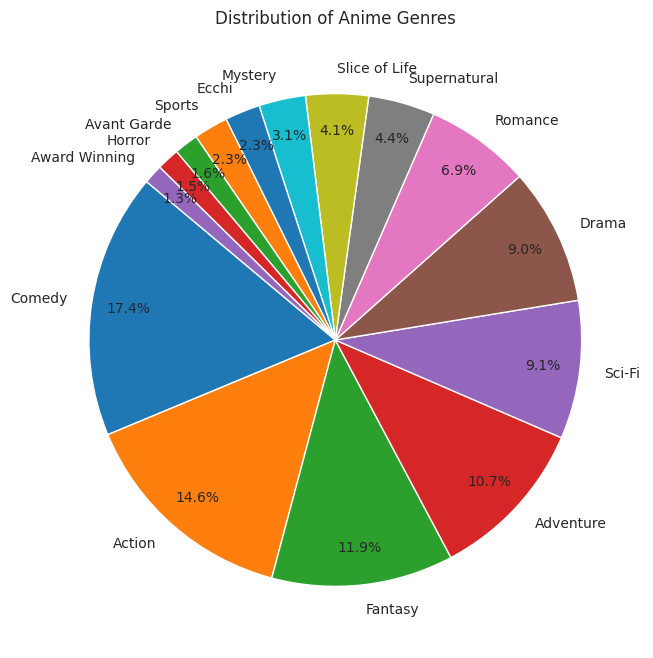

In [ ]:
top_15_genres = Genre_Counts.head(15)
plt.figure(figsize=(8, 8))
plt.pie(top_15_genres.values, labels=top_15_genres.index, autopct='%1.1f%%', startangle=140,pctdistance=0.85)
plt.title('Distribution of Anime Genres')
plt.show()

**Top 10 Anime Licensors**

In [ ]:
df_anime['Licensors'].value_counts()

UNKNOWN                                                  3356
Funimation                                                717
Sentai Filmworks                                          592
Aniplex of America                                        175
Discotek Media                                            165
                                                         ... 
Funimation, NBCUniversal Entertainment Japan                1
Funimation, Discotek Media, Geneon Entertainment USA        1
Bandai Entertainment, Aniplex of America                    1
Sony Pictures Entertainment, Mill Creek Entertainment       1
Arts Magic                                                  1
Name: Licensors, Length: 208, dtype: int64

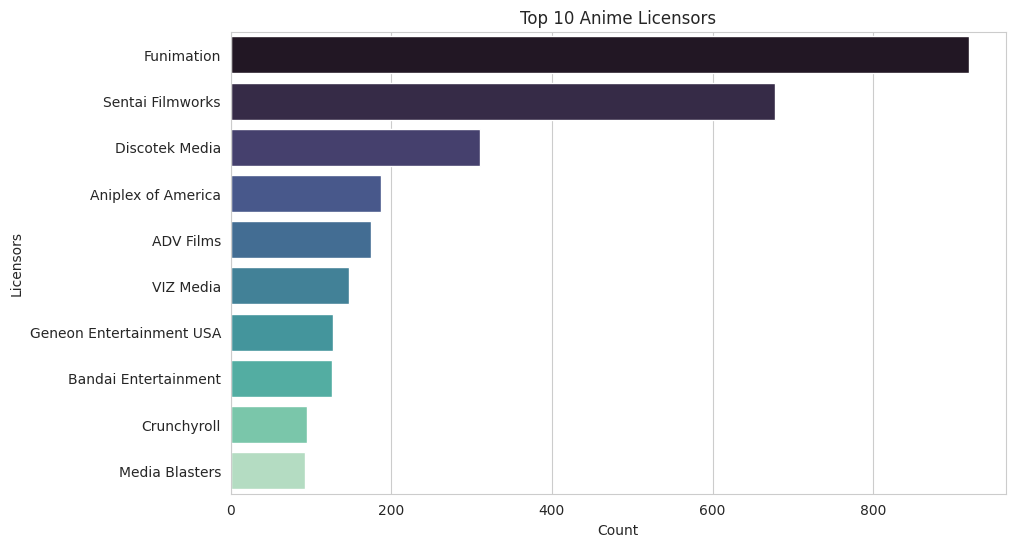

In [ ]:
# Create a list of all the individual licensors
licensors_list = [licensor.strip() for licensors in df_anime[df_anime['Licensors']!="UNKNOWN"]['Licensors'].str.split(',') for licensor in licensors]

# Count the occurrences of each licensor
licensor_counts = pd.Series(licensors_list).value_counts()

# Filter the licensor_counts series to exclude 'Unknown'
filtered_licensor_counts = licensor_counts[licensor_counts.index != 'Unknown']

# Select the top 10 licensors
top_10_licensors = filtered_licensor_counts.head(10)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_licensors.values, y=top_10_licensors.index, palette='mako')
plt.title('Top 10 Anime Licensors')
plt.xlabel('Count')
plt.ylabel('Licensors')
plt.show()


**Distribution Premiered Season**

In [ ]:
df_anime['Premiered'].value_counts()

UNKNOWN        2090
fall 2016        69
spring 2018      68
spring 2017      64
spring 2006      63
               ... 
summer 1992       2
summer 1991       1
summer 1981       1
winter 1985       1
summer 1986       1
Name: Premiered, Length: 174, dtype: int64

In [ ]:
# Function to extract the season and year from the premiered string
def extract_season_year(premiered):
    if premiered == 'UNKNOWN':
        return None, None
    else:
        season, year = premiered.split()
        return season, int(year)

# Apply the function to extract the season and year from the "Premiered" column
season_year = df_anime['Premiered'].map(extract_season_year)
premiered_season = season_year.apply(lambda x: x[0])
premiered_Year = season_year.apply(lambda x: x[1])

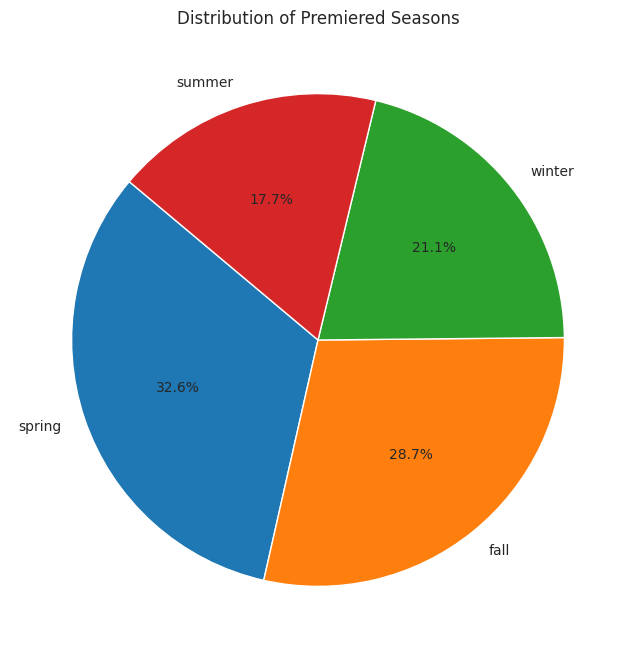

In [ ]:
# Filter out None values from premiered_season
filtered_premiered_season = premiered_season.dropna()

# Count the occurrences of each season
season_counts = filtered_premiered_season.value_counts()

# Create the pie plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Distribution of Premiered Seasons')
plt.show()

**Top 10 Studios With Highest Number Of Anime Released**

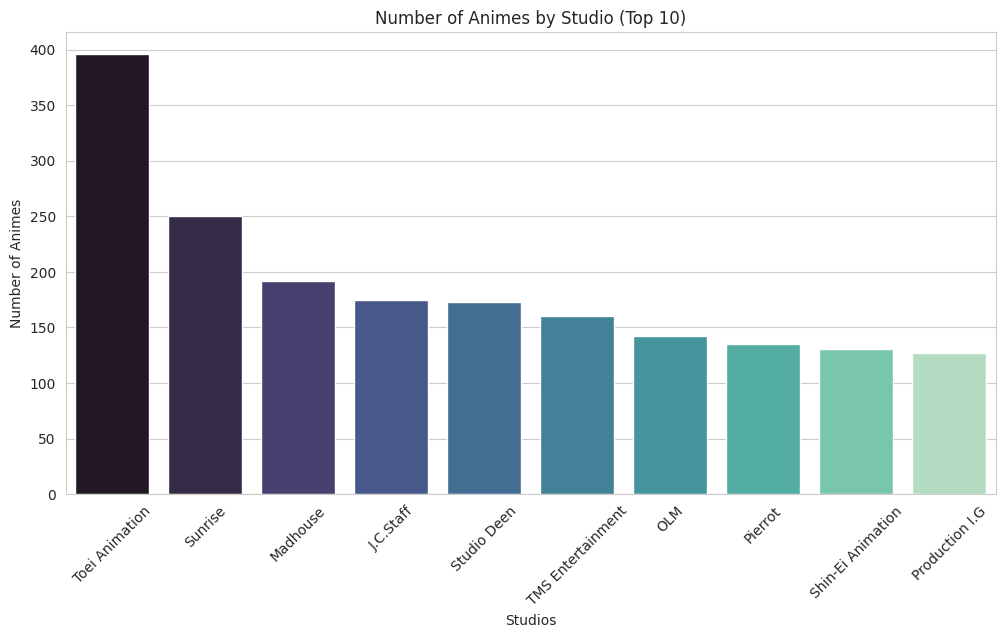

In [ ]:
# Count the occurrences of each studio
studio_counts = df_anime['Studios'].value_counts()

# Filter the studio_counts series to exclude 'Unknown'
studio_counts = studio_counts[studio_counts.index != 'UNKNOWN']

# Select the top 10 studios with the highest number of animes
top_studios = studio_counts.head(10)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios.index, y=top_studios.values, hue=top_studios.index, palette='mako',legend=False)
plt.title('Number of Animes by Studio (Top 10)')
plt.xlabel('Studios')
plt.ylabel('Number of Animes')
plt.xticks(rotation=45)
plt.show()

**Number Of Anime By Source**

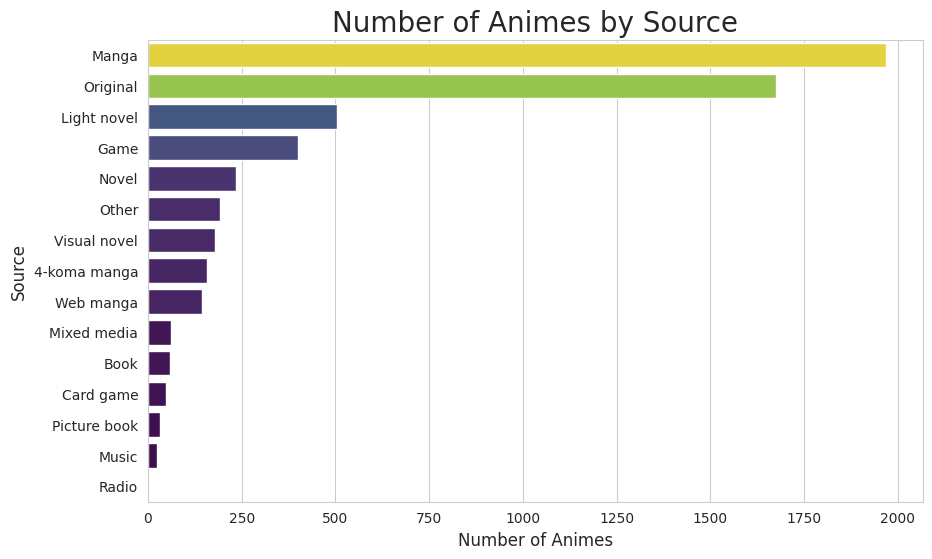

In [ ]:
# Count the occurrences of each source
source_counts = df_anime['Source'].value_counts()

# Filter the source_counts series to exclude 'Unknown'
source_counts = source_counts[source_counts.index != 'Unknown']

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.values, y=source_counts.index,hue=source_counts, palette='viridis', legend=False)

# Set the title and axis labels
plt.title('Number of Animes by Source', fontsize=20)
plt.xlabel('Number of Animes', fontsize=12)
plt.ylabel('Source', fontsize=12)

# Show the plot
plt.show()

**Count Of Animes Based On Its Native Language**

In [ ]:
# Function to map abbreviated language codes to full names
def map_language_code(code):
    language_mapping = {
        'ja': 'Japanese',
        'ko': 'Korean',
        'zh-cn': 'Simplified Chinese',
        'de': 'German',
        'vi': 'Vietnamese',
        'en': 'English',
        'zh-tw': 'Traditional Chinese'
    }
    return language_mapping.get(code, 'Other')

# Function to detect language
def detect_language(name):
    try:
        return detect(name)
    except:
        return None  # Return None for rows where detection fails

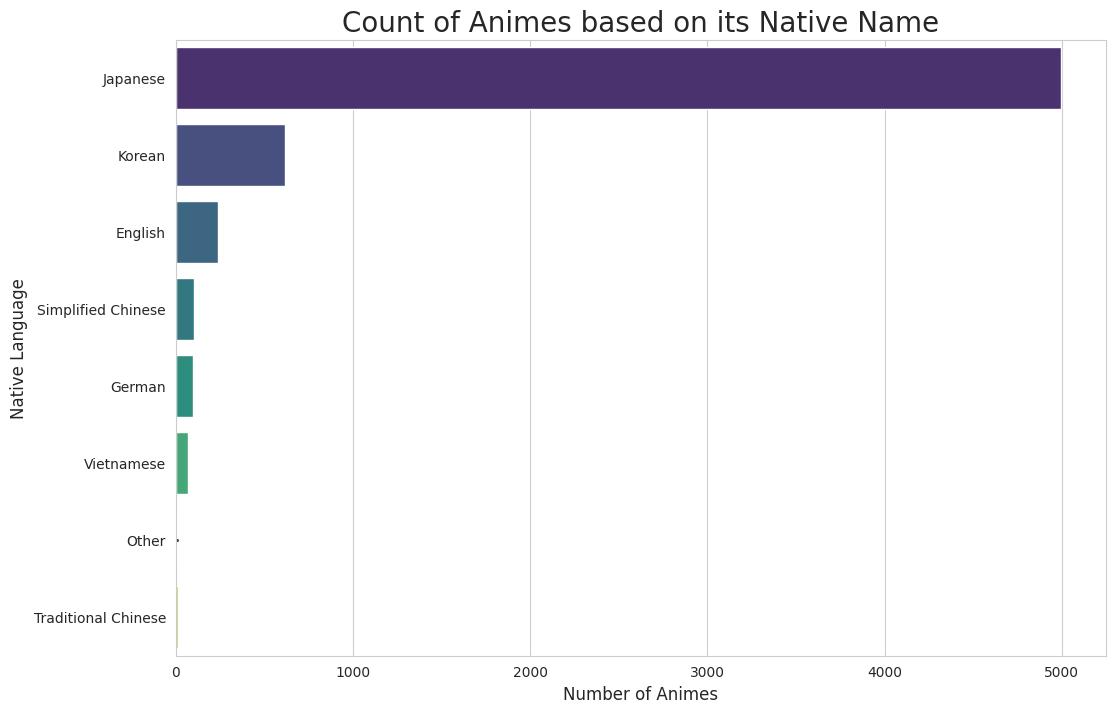

In [ ]:
# Apply language detection to the 'Other name' column
Detected_Language = df_anime[df_anime['Other name'] != "UNKNOWN"]['Other name'].apply(detect_language)

# Drop rows where language detection failed (i.e., where Detected_Language is None)
Detected_Language = Detected_Language.dropna()

# Count the occurrences of each language
language_counts = Detected_Language.value_counts()

# Map abbreviated language codes to full names for plotting
language_counts.index = language_counts.index.map(map_language_code)

# Increase figure size
plt.figure(figsize=(12, 8))

# Plot horizontal bar chart
sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')

# Set the title and axis labels
plt.title('Count of Animes based on its Native Name', fontsize=20)
plt.xlabel('Number of Animes', fontsize=12)
plt.ylabel('Native Language', fontsize=12)
plt.show()

**User DataSet**

**Gender Distribution**

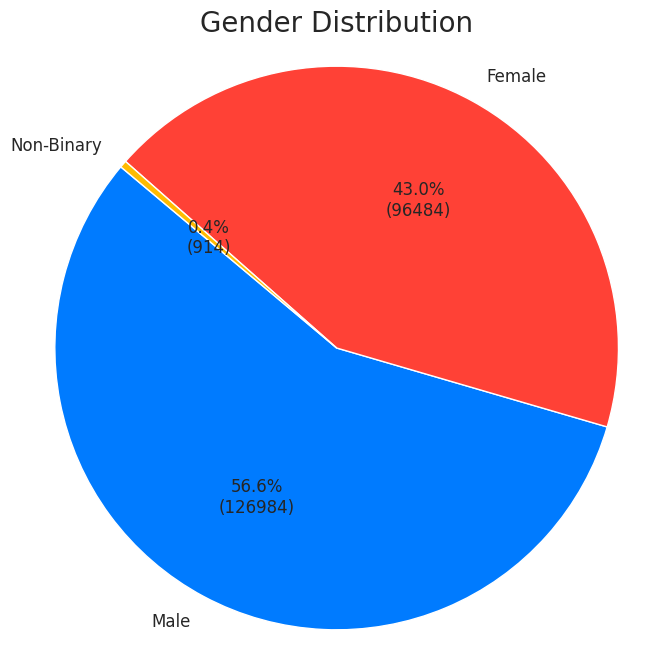

In [ ]:
# Count the occurrences of each gender
gender_counts = df_user['Gender'].value_counts(dropna=True)

# Define custom colors for the pie slices
colors = ['#007BFF', '#FF4136', '#FFBB00', '#7D7D7D']

# Calculate percentages
total_count = gender_counts.sum()
percentages = [(count / total_count) * 100 for count in gender_counts]

# Create the pie plot
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors, autopct=lambda p: f'{p:.1f}%\n({int(p * total_count / 100)})', startangle=140, textprops={'fontsize': 12})
plt.title('Gender Distribution', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

**Watching Behavior Of midnightq2**

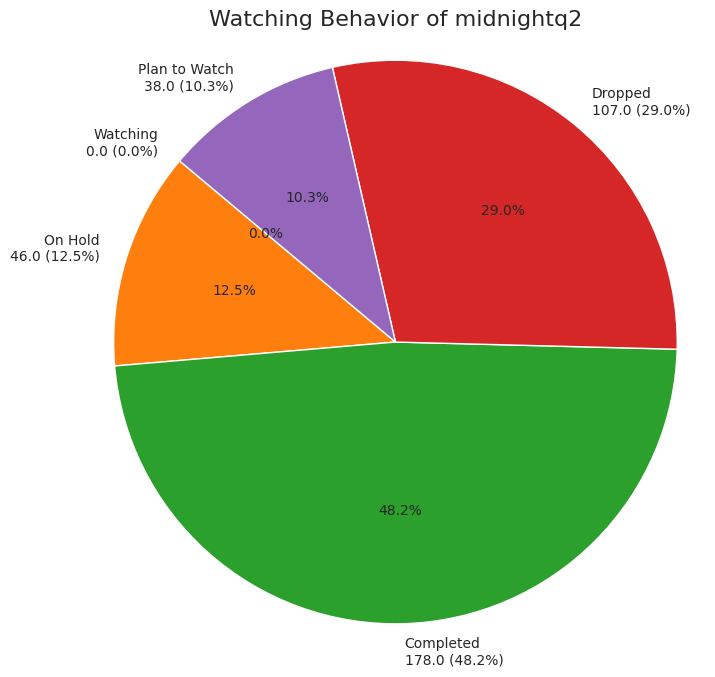

In [ ]:
# Function to get watching behavior of a specific user
def get_watching_behavior(username):
    user_data = df_user[df_user['Username'] == username]
    if len(user_data) == 0:
        return None
    watching = user_data['Watching'].values[0]
    on_hold = user_data['On Hold'].values[0]
    completed = user_data['Completed'].values[0]
    dropped = user_data['Dropped'].values[0]
    plan_to_watch = user_data['Plan to Watch'].values[0]
    return watching, on_hold, completed, dropped, plan_to_watch

# Get the input username from the user
username_input = "midnightq2"  # input("Enter the username: ")

# Get the watching behavior of the user
watching, on_hold, completed, dropped, plan_to_watch = get_watching_behavior(username_input)

# Create data for the pie chart
labels = ['Watching', 'On Hold', 'Completed', 'Dropped', 'Plan to Watch']
sizes = [watching, on_hold, completed, dropped, plan_to_watch]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Calculate percentages
total_count = sum(sizes)
percentages = [(size / total_count) * 100 for size in sizes]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=[f'{label}\n{size} ({percentage:.1f}%)' for label, size, percentage in zip(labels, sizes, percentages)],
        colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f"Watching Behavior of {username_input}", fontsize=16)

# Show the plot
plt.axis('equal')
plt.show()


**Top 10 Animes Watched By Most Users**

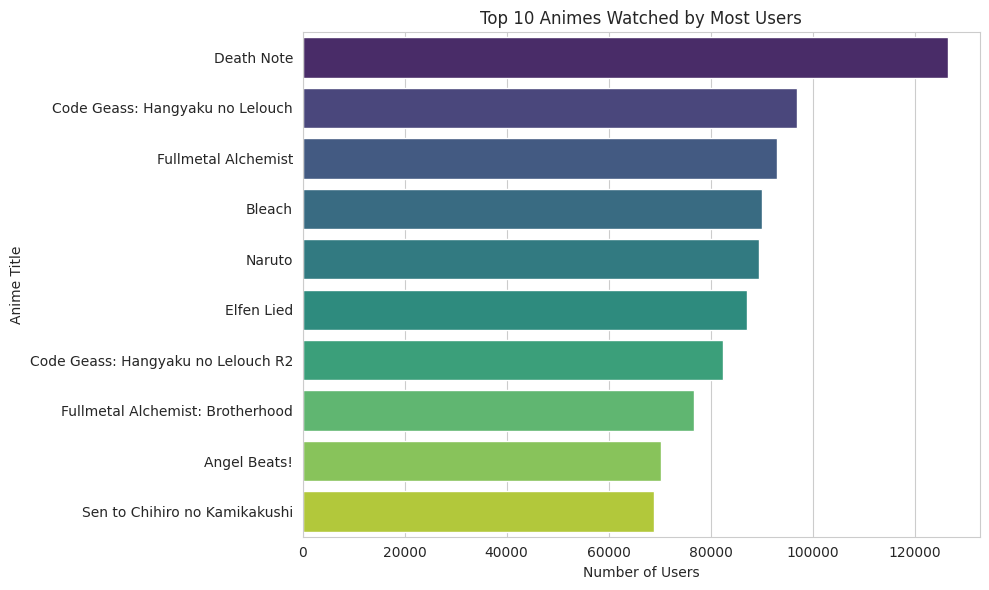

In [ ]:
# Get the count of users who watched each anime title
anime_watch_count = df_score.groupby('Anime Title')['user_id'].nunique().reset_index()
anime_watch_count = anime_watch_count.rename(columns={'user_id': 'User Count'})

# Sort the dataframe in descending order by the number of users
anime_watch_count = anime_watch_count.sort_values(by='User Count', ascending=False)

# Select the top 10 anime titles with the highest number of users
top_n = 10
top_anime_watch_count = anime_watch_count.head(top_n)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_anime_watch_count, x='User Count', y='Anime Title', hue='Anime Title', palette='viridis', legend=False)
plt.title(f'Top {top_n} Animes Watched by Most Users')
plt.xlabel('Number of Users')
plt.ylabel('Anime Title')

# Show the plot
plt.tight_layout()
plt.show()

# ***Collaborative Filtering***

In [ ]:
print("Shape of the Dataset:",df_score.shape)
df_score.head()

Shape of the Dataset: (20031107, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
4,1,Xinil,304,Aa! Megami-sama! Movie,8
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8
6,1,Xinil,53,Ai Yori Aoshi,7


In [ ]:
# Checking if there are any duplicate rows
duplicated_rows = df_score[df_score.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [user_id, Username, anime_id, Anime Title, rating]
Index: []


In [ ]:
# Calculating the average score
avg_score = np.mean(df_score['rating'])
print('Average Score:', avg_score)

Average Score: 7.705657305909254


In [ ]:
g = df_score.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = df_score.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = df_score.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,1,20,30,121,199,226,269,431,849,853,1535,1575,1735,2025,2167,2904,5114,6547,6746,8074
user_id,,,,,,,,,,,,,,,,,,,,
2276,9.0,NaN,5.0,8.0,9.0,8.0,6.0,8.0,8.0,8.0,7.0,8.0,NaN,8.0,7.0,8.0,NaN,7.0,9.0,6.0
6140,9.0,7.0,10.0,8.0,7.0,9.0,8.0,8.0,10.0,7.0,9.0,8.0,8.0,7.0,9.0,9.0,9.0,8.0,8.0,8.0
17481,9.0,7.0,9.0,8.0,9.0,8.0,7.0,10.0,8.0,8.0,9.0,8.0,6.0,7.0,8.0,8.0,8.0,7.0,8.0,7.0
33547,9.0,7.0,6.0,6.0,6.0,2.0,4.0,7.0,9.0,6.0,7.0,6.0,4.0,7.0,3.0,4.0,9.0,2.0,6.0,3.0
50470,6.0,8.0,8.0,7.0,8.0,8.0,7.0,8.0,8.0,6.0,7.0,7.0,7.0,6.0,9.0,6.0,NaN,8.0,6.0,6.0
106788,8.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,8.0,9.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,7.0
111604,10.0,5.0,10.0,9.0,10.0,4.0,6.0,7.0,7.0,7.0,6.0,2.0,NaN,6.0,6.0,NaN,5.0,9.0,6.0,8.0
114861,7.0,5.0,9.0,6.0,4.0,5.0,5.0,4.0,6.0,6.0,5.0,10.0,NaN,7.0,8.0,10.0,6.0,8.0,7.0,6.0
292624,7.0,2.0,8.0,5.0,7.0,NaN,3.0,5.0,7.0,9.0,6.0,7.0,2.0,7.0,NaN,6.0,8.0,3.0,6.0,4.0


In [ ]:
# Scaling our "rating" column
# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'score' column between 0 and 1
df_score['scaled_score'] = scaler.fit_transform(df_score[['rating']])

In [ ]:
# Encoding categorical data

## Encoding user IDs
user_encoder = LabelEncoder()
df_score["user_encoded"] = user_encoder.fit_transform(df_score["user_id"])
num_users = len(user_encoder.classes_)

## Encoding anime IDs
anime_encoder = LabelEncoder()
df_score["anime_encoded"] = anime_encoder.fit_transform(df_score["anime_id"])
num_animes = len(anime_encoder.classes_)

# Printing dataset information
print("Number of unique users: {}, Number of unique anime: {}".format(num_users, num_animes))
print("Minimum rating: {}, Maximum rating: {}".format(min(df_score['rating']), max(df_score['rating'])))

Number of unique users: 267184, Number of unique anime: 6822
Minimum rating: 1, Maximum rating: 10


In [ ]:
df_score

,user_id,Username,anime_id,Anime Title,rating,scaled_score,user_encoded,anime_encoded
0,1,Xinil,21,One Piece,9,0.888889,0,11
1,1,Xinil,48,.hack//Sign,7,0.666667,0,28
4,1,Xinil,304,Aa! Megami-sama! Movie,8,0.777778,0,233
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8,0.777778,0,234
6,1,Xinil,53,Ai Yori Aoshi,7,0.666667,0,31
...,...,...,...,...,...,...,...,...
24325186,1291087,Oblongata,10611,R-15,3,0.222222,267182,3209
24325187,1291087,Oblongata,174,Tenjou Tenge,6,0.555556,267182,135
24325188,1291097,JuunanaSai,1535,Death Note,9,0.888889,267183,897
24325189,1291097,JuunanaSai,226,Elfen Lied,10,1.000000,267183,168


In [ ]:
# Shuffle the dataset
df_score = shuffle(df_score, random_state=100)

# Create feature matrix X and target variable y
X = df_score[['user_encoded', 'anime_encoded']].values
y = df_score["scaled_score"].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20031107, 2)
Shape of y: (20031107,)


In [ ]:
test_set_size = 10000  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))


Number of samples in the training set: 20021107
Number of samples in the test set: 10000


In [ ]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
X_train_array

[array([ 46682,  24580, 162679, ..., 222439, 157203, 170567]),
 array([ 160, 3404, 1719, ...,  191, 4809, 5022])]

In [ ]:
# Setting TPU_INIT flag
USE_TPU = True

# Checking if TPU is initialized
if USE_TPU:
    # If tpu is connected then start creating TPUStrategy
    tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.TPUStrategy(tpu_resolver)
else:
    !nvidia-smi

# Print the TensorFlow version
tf_version = tf.__version__
print(f"TensorFlow version: {tf_version}")

TensorFlow version: 2.12.0


In [ ]:

def RecommenderNet(num_users, num_animes, embedding_size=128):
    # User input layer and embedding layer
    user = Input(name='user_encoded', shape=[1])
    user_embedding = Embedding(name='user_embedding', input_dim=num_users, output_dim=embedding_size)(user)

    # Anime input layer and embedding layer
    anime = Input(name='anime_encoded', shape=[1])
    anime_embedding = Embedding(name='anime_embedding', input_dim=num_animes, output_dim=embedding_size)(anime)

    # Dot product of user and anime embeddings
    dot_product = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    flattened = Flatten()(dot_product)

    # Dense layers for prediction
    dense = Dense(64, activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)

    # Create and compile the model
    model = Model(inputs=[user, anime], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["mae", "mse"])

    return model
# Checking if TPU is initialized and create the model accordingly
if USE_TPU:
    with tpu_strategy.scope():
        model = RecommenderNet(num_users, num_animes,EMBEDDING_SIZE)
else:
    model = RecommenderNet(num_users, num_animes,EMBEDDING_SIZE)

# Printing my model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 anime_encoded (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        13359200    ['user_encoded[0][0]']           
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 50)        341100      ['anime_encoded[0][0]']          
                                                                                              

In [ ]:
# Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.00001
min_lr = 0.00005
max_lr = 0.00005
batch_size = 10000

# Adjust the maximum learning rate and batch size if using TPU
if USE_TPU:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = '/content/drive/MyDrive/archive/myanimeweights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]


In [ ]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
2503/2503 [==============================] - 109s 40ms/step - loss: 0.5543 - mae: 0.1291 - mse: 0.0280 - val_loss: 0.5323 - val_mae: 0.1043 - val_mse: 0.0190 - lr: 0.0010
Epoch 2/20
2503/2503 [==============================] - 93s 37ms/step - loss: 0.5309 - mae: 0.1047 - mse: 0.0193 - val_loss: 0.5282 - val_mae: 0.1001 - val_mse: 0.0176 - lr: 0.0088
Epoch 3/20
2503/2503 [==============================] - 92s 37ms/step - loss: 0.5234 - mae: 0.0972 - mse: 0.0168 - val_loss: 0.5274 - val_mae: 0.0995 - val_mse: 0.0174 - lr: 0.0166
Epoch 4/20
2503/2503 [==============================] - 93s 37ms/step - loss: 0.5188 - mae: 0.0926 - mse: 0.0153 - val_loss: 0.5279 - val_mae: 0.0994 - val_mse: 0.0175 - lr: 0.0244
Epoch 5/20
2503/2503 [==============================] - 92s 37ms/step - loss: 0.5158 - mae: 0.0893 - mse: 0.0144 - val_loss: 0.5283 - val_mae: 0.0994 - val_mse: 0.0176 - lr: 0.0322
Epoch 6/20
2503/2503 [==============================] - 92s 37ms/step - loss: 0.5135 - mae: 0.

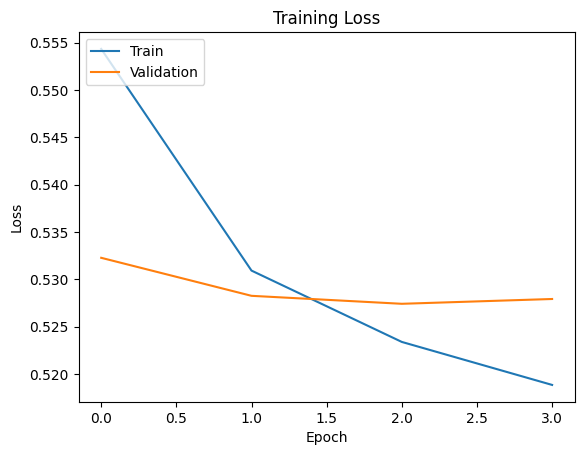

In [ ]:
# Training results visualization

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
df_score

,user_id,Username,anime_id,Anime Title,rating,scaled_score,user_encoded,anime_encoded
9956616,342222,Sillfon,4063,Sekirei,7,0.666667,104589,1953
1180438,15338,Lajto-kun,7647,Arakawa Under the Bridge,6,0.555556,9928,2710
10229632,347805,Tony-kun,3087,Cencoroll,7,0.666667,107938,1636
12173629,388159,SynapticRelay,8676,Amagami SS,7,0.666667,130899,2887
3186978,44046,Elear,1279,Taiyou no Ko Esteban,10,1.000000,28669,798
...,...,...,...,...,...,...,...,...
906591,11074,rettev,934,Higurashi no Naku Koro ni,8,0.777778,7211,621
5500561,86436,JB-2,71,Full Metal Panic!,8,0.777778,53120,48
15513204,466706,SlayersZ,393,Escaflowne,4,0.333333,168306,297
13948739,428819,zatchi,143,Kannazuki no Miko,7,0.666667,151078,106


In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import keras
from keras import layers
from keras import ops
df_score=pd.read_csv('/content/drive/MyDrive/archive.zip (Unzipped Files)/users-score-2023.csv')
print('Shape of the df_score',df_score.shape)
df_score.head()
"""
First, need to perform some preprocessing to encode users and movies as integer indices.
"""
user_ids = df_score["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df_score["anime_id"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df_score["user"] = df_score["user_id"].map(user2user_encoded)
df_score["movie"] = df_score["anime_id"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df_score["rating"] = df_score[['rating']].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df_score["rating"])
max_rating = max(df_score["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

"""
## Prepare training and validation data
"""
df = df_score.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

Shape of the df_score (24325191, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [ ]:
"""
First, need to perform some preprocessing to encode users and movies as integer indices.
"""
user_ids = df_score["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df_score["anime_id"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df_score["user"] = df_score["user_id"].map(user2user_encoded)
df_score["movie"] = df_score["anime_id"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df_score["rating"] = df_score[['rating']].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df_score["rating"])
max_rating = max(df_score["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

"""
## Prepare training and validation data
"""
df = df_score.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)


Number of users: 270033, Number of Movies: 16500, Min rating: 1.0, Max rating: 10.0


In [ ]:
!pip install --upgrade keras

In [ ]:

"""
## Create the model

We embed both users and movies in to 50-dimensional vectors.

The model computes a match score between user and movie embeddings via a dot product,
and adds a per-movie and per-user bias. The match score is scaled to the `[0, 1]`
interval via a sigmoid (since our ratings are normalized to this range).
"""
import tensorflow as tf


EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = ops.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return ops.nn.sigmoid(x)
# Setting TPU_INIT flag
USE_TPU = True

# Checking if TPU is initialized
if USE_TPU:
    # If tpu is connected then start creating TPUStrategy
    tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.TPUStrategy(tpu_resolver)
with tpu_strategy.scope():
  model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)


In [ ]:
model.summary()

Model: "recommender_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │      13,501,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ ?                           │         270,033 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ ?                           │         825,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_7 (Embedding)              │ ?                           │          16,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,613,185 (55.74 MB)

 Trainable params: 14,613,183 (55.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Import necessary callbacks
## Import necessary modules for collaborative filtering
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from keras import layers
from keras.models import Model
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.001
min_lr = 0.0005
max_lr = 0.005
batch_size = 1000

# Adjust the maximum learning rate and batch size if using TPU
if USE_TPU:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = '/content/drive/MyDrive/archive/myanime_2_.weights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]

In [ ]:


"""
## Plot training and validation loss
"""
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

"""
## Show top 10 movie recommendations to a user
"""

movie_df = pd.read_csv(movielens_dir / "movies.csv")

# Let us get a user and see the top recommendations.
user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

Epoch 1/5


RuntimeError: Mixing different tf.distribute.Strategy objects: <tensorflow.python.distribute.tpu_strategy.TPUStrategyV2 object at 0x7aa6eda316c0> is not <tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy object at 0x7aa8e8b8d840>

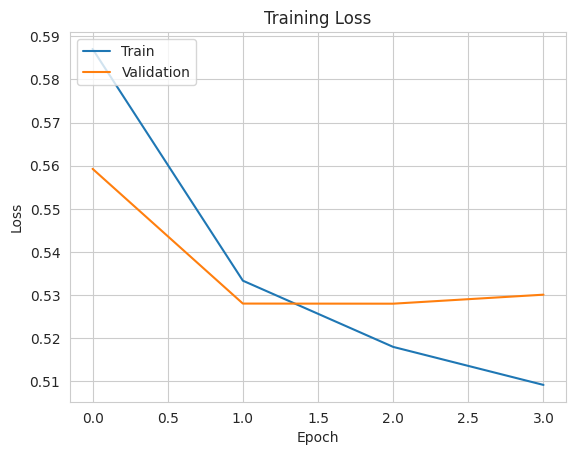

In [ ]:
# Training results visualization

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = model.get_layer(name)

    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]

    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))

    return weights

# Extract weights for anime embeddings
anime_weights = extract_weights('anime_embedding', model)
# Extract weights for user embeddings
user_weights = extract_weights('user_embedding', model)

In [ ]:
popularity_threshold = 50
df_anime= df_anime.query('Members >= @popularity_threshold')
print(df_anime.shape)
df_anime.head(3)      # only give rating of those movies for which atleast 200 user have rated

(6314, 25)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3


In [ ]:
def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        anime_row = df_anime[df_anime['Name'] == name].iloc[0]
        index = anime_row['anime_id']
        encoded_index = anime_encoder.transform([index])[0]
        weights = anime_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
        print('Animes closest to {}'.format(name))
        if return_dist:
            return dists, closest

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoder.inverse_transform([close])[0]
            anime_frame = df_anime[df_anime['anime_id'] == decoded_id]

            anime_name = anime_frame['Name'].values[0]
            english_name = anime_frame['English name'].values[0]
            name = english_name if english_name != "UNKNOWN" else anime_name
            genre = anime_frame['Genres'].values[0]
            Synopsis = anime_frame['Synopsis'].values[0]
            similarity = dists[close]
            similarity = "{:.2f}%".format(similarity * 100)
            SimilarityArr.append({"Name": name, "Similarity": similarity, "Genres": genre, "Synopsis":Synopsis})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        return Frame[Frame.Name != name]
    except:
        print('{} not found in Anime list'.format(name))

pd.set_option('display.max_colwidth', None)

In [ ]:
find_similar_animes('Kimetsu no Yaiba', n=25, neg=False)

Animes closest to Kimetsu no Yaiba


,Name,Similarity,Genres,Synopsis
24,Demon Slayer: Kimetsu no Yaiba Entertainment District Arc,85.23%,"Action, Fantasy","The devastation of the Mugen Train incident still weighs heavily on the members of the Demon Slayer Corps. Despite being given time to recover, life must go on, as the wicked never sleep: a vicious demon is terrorizing the alluring women of the Yoshiwara Entertainment District. The Sound Pillar, Tengen Uzui, and his three wives are on the case. However, when he soon loses contact with his spouses, Tengen fears the worst and enlists the help of Tanjirou Kamado, Zenitsu Agatsuma, and Inosuke Hashibira to infiltrate the district's most prominent houses and locate the depraved Upper Rank demon."
23,Demon Slayer: Kimetsu no Yaiba - The Movie: Mugen Train,83.52%,"Action, Fantasy","After a string of mysterious disappearances begin to plague a train, the Demon Slayer Corps' multiple attempts to remedy the problem prove fruitless. To prevent further casualties, the Flame Pillar, Kyoujurou Rengoku, takes it upon himself to eliminate the threat. Accompanying him are some of the Corps' most promising new blood: Tanjirou Kamado, Zenitsu Agatsuma, and Inosuke Hashibira, who all hope to witness the fiery feats of this model demon slayer firsthand.\n\nUnbeknownst to them, the demonic forces responsible for the disappearances have already put their sinister plan in motion. Under this demonic presence, the group must muster every ounce of their willpower and draw their swords to save all two hundred passengers onboard. Kimetsu no Yaiba Movie: Mugen Ressha-hen delves into the deepest corners of Tanjirou's mind, putting his resolve and commitment to duty to the test."
22,Demon Slayer: Kimetsu no Yaiba Mugen Train Arc,74.02%,"Action, Fantasy","A mysterious string of disappearances on a certain train has caught the attention of the Demon Slayer Corps, and they have sent one of their best to exterminate what can only be a demon responsible. However, the plan to board the Mugen Train is delayed by a lesser demon who is terrorizing the mechanics and targeting a kind, elderly woman and her granddaughter. Kyoujurou Rengoku, the Flame Pillar, must eliminate the threat before boarding the train.\n\nSent to assist the Pillar, Tanjirou Kamado, Inosuke Hashibira, and Zenitsu Agatsuma enter the train prepared to fight. But their monstrous target already has a devious plan in store for them and the two hundred passengers: by delving deep into their consciousness, the demon intends to obliterate everyone in a stunning display of the power held by the Twelve Demon Moons."
21,Demon Slayer: Kimetsu no Yaiba Swordsmith Village Arc,69.47%,"Action, Fantasy","For centuries, the Demon Slayer Corps has sacredly kept the location of Swordsmith Village a secret. As the village of the greatest forgers, it provides Demon Slayers with the finest weapons, which allow them to fight night-crawling fiends and ensure the safety of humans. After his sword was chipped and deemed useless, Tanjirou Kamado, along with his precious little sister Nezuko, is escorted to the village to receive a new one.\n\nMeanwhile, the death of an Upper Rank Demon disturbs the idle order in the demon world. As Tanjirou becomes acquainted with Mist Hashira Muichirou Tokitou and Love Hashira Mitsuri Kanroji, ferocious powers creep from the shadows and threaten to shatter the Demon Slayers' greatest line of defense."
20,Jujutsu Kaisen,63.63%,"Action, Award Winning, Fantasy","Idly indulging in baseless paranormal activities with the Occult Club, high schooler Yuuji Itadori spends his days at either the clubroom or the hospital, where he visits his bedridden grandfather. However, this leisurely lifestyle soon takes a turn for the strange when he unknowingly encounters a cursed item. Triggering a chain of supernatural occurrences, Yuuji finds himself suddenly thrust into the world of Curses—dreadful beings formed from human malice and negativity—after swallowing the said item, revealed to b

In [ ]:
find_similar_animes('Tensei shitara Slime Datta Ken', n=25, neg=False)

Animes closest to Tensei shitara Slime Datta Ken


,Name,Similarity,Genres,Synopsis
24,That Time I Got Reincarnated as a Slime Season 2,79.69%,"Action, Adventure, Comedy, Fantasy","Taking a break from his time as a teacher, the powerful slime Rimuru Tempest returns to his kingdom, eponymously named Tempest, just in time to begin negotiations with a nearby nation—the Kingdom of Eurazania. While the negotiations are anything but peaceful, they do end successfully, allowing Rimuru to return and finish teaching. When trying to again return to Tempest, this time permanently, Rimuru is stopped by a mysterious figure who is somehow able to constrain the many magical abilities he has at his disposal. \n\nIn Tempest, the situation is even worse. A group of unknown humans has invaded the land and are assaulting its citizens, both influential and innocent. They are not just trying to bring harm either—they have the intent to kill. Can Rimuru overcome his powerful and dangerous foe and return to Tempest before it is too late?"
23,That Time I Got Reincarnated as a Slime Season 2 Part 2,75.23%,"Action, Adventure, Comedy, Fantasy","The nation of Tempest is in a festive mood after successfully overcoming the surprise attack from the Falmuth Army and the Western Holy Church. Beyond the festivities lies a meeting between Tempest and its allies to decide the future of the Nation of Monsters. The aftermath of the Falmuth invasion, Milim Nava's suspicious behavior, and the disappearance of Demon Lord Carrion—the problems seem to keep on piling up.\n\nRimuru Tempest, now awakened as a ""True Demon Lord,"" decides to go on the offensive against Clayman. With the fully revived ""Storm Dragon"" Veldora, ""Ultimate Skill"" Raphael, and other powerful comrades, the ruler of the Tempest is confident in taking down his enemies one by one until he can face the man pulling the strings."
22,The Rising of the Shield Hero,65.39%,"Action, Adventure, Drama, Fantasy","The Four Cardinal Heroes are a group of ordinary men from modern-day Japan summoned to the kingdom of Melromarc to become its saviors. Melromarc is a country plagued by the Waves of Catastrophe that have repeatedly ravaged the land and brought disaster to its citizens for centuries. The four heroes are respectively bestowed a sword, spear, bow, and shield to vanquish these Waves. Naofumi Iwatani, an otaku, becomes cursed with the fate of being the ""Shield Hero."" Armed with only a measly shield, Naofumi is belittled and ridiculed by his fellow heroes and the kingdom's people due to his weak offensive capabilities and lackluster personality.\n\nWhen the heroes are provided with resources and comrades to train with, Naofumi sets out with the only person willing to train alongside him, Malty Melromarc. He is soon betrayed by her, however, and becomes falsely accused of taking advantage of her. Naofumi then becomes heavily discriminated against and hated by the people of Melromarc for something he didn't do. With a raging storm of hurt and mistrust in his heart, Naofumi begins his journey of strengthening himself and his reputation. Further along however, the difficulty of being on his own sets in, so Naofumi buys a demi-human slave on the verge of death named Raphtalia to accompany him on his travels.\n\nAs the Waves approach the kingdom, Naofumi and Raphtalia must fight for the survival of the kingdom and protect the people of Melromarc from their ill-fated future."
21,Overlord IV,55.00%,"Action, Adventure, Fantasy","E-Rantel, the capital city of the newly established Sorcerer Kingdom, suffers from a dire shortage of goods. Once a prosperous city known for its trade, it now faces a crisis due to its caution—or even fear—of its king, Ainz Ooal Gown. To make amends, Ainz sends Albedo to the city as a diplomatic envoy.\n\nMeanwhile, the cardinals of the Slane Theocracy discuss how to retaliate against Ainz after his attack crippled the Re-Estize Kingdom's army, plotting for the Baharuth Empire to take over the Sorcerer Kingdom. However, when Emperor Jir

In [ ]:
find_similar_animes('One Piece', n=25, neg=False)

Animes closest to One Piece


,Name,Similarity,Genres,Synopsis
24,One Piece Film: Strong World,65.37%,"Action, Adventure, Fantasy","Upon hearing news that islands in East Blue are being destroyed, Monkey D. Luffy and his crew go to investigate. On their way, however, an outlandish pirate ship appears out of the sky, helmed by the infamous pirate Shiki ""the Golden Lion""—a man who ate the Float-Float Fruit and the first ever prisoner to escape from Impel Down. In his quest to defeat the World Government, Shiki kidnaps Nami to be his own navigator and sends the rest of the Straw Hat Pirates to his floating islands as hostages, leaving her in a dilemma. Separated in a land under Shiki's absolute control, Luffy and his crew must survive the mystifying terrain in order to bring back their navigator and friend."
23,One Piece Film Z,52.35%,"Action, Adventure, Fantasy","The Straw Hat Pirates enter the rough seas of the New World in search of the hidden treasures of the Pirate King, Gol D. Roger－One Piece. On their voyage, the pirates come across a terrifying, powerful man, former Marine Admiral Z.\n\nZ is accused of having stolen the ""Dyna Stones"", weapons believed to have the power to shake up the New World. The Marine Headquarters believes Z is about to use it to end the pirate era, and with it, the lives of many innocent people. In fear of such a phenomenal event, marines start to take action against the former admiral.\n\nEven if it means stumbling upon marines and the navy, the Straw Hat Pirates decided to chase after Z and stop him from causing havoc. As they continue to embark on their ventures, the pirates bump into new and familiar acquaintances."
22,Hunter x Hunter,51.00%,"Action, Adventure, Fantasy","Hunters devote themselves to accomplishing hazardous tasks, all from traversing the world's uncharted territories to locating rare items and monsters. Before becoming a Hunter, one must pass the Hunter Examination—a high-risk selection process in which most applicants end up handicapped or worse, deceased.\n\nAmbitious participants who challenge the notorious exam carry their own reason. What drives 12-year-old Gon Freecss is finding Ging, his father and a Hunter himself. Believing that he will meet his father by becoming a Hunter, Gon takes the first step to walk the same path.\n\nDuring the Hunter Examination, Gon befriends the medical student Leorio Paladiknight, the vindictive Kurapika, and ex-assassin Killua Zoldyck. While their motives vastly differ from each other, they band together for a common goal and begin to venture into a perilous world."
21,Gintama Season 4,49.43%,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the fun-loving but broke members of the Yorozuya team! Living in an alternate-reality Edo, where swords are prohibited and alien overlords have conquered Japan, they try to thrive on doing whatever work they can get their hands on. However, Shinpachi and Kagura still haven't been paid... Does Gin-chan really spend all that cash playing pachinko?\n\nMeanwhile, when Gintoki drunkenly staggers home one night, an alien spaceship crashes nearby. A fatally injured crew member emerges from the ship and gives Gintoki a strange, clock-shaped device, warning him that it is incredibly powerful and must be safeguarded. Mistaking it for his alarm clock, Gintoki proceeds to smash the device the next morning and suddenly discovers that the world outside his apartment has come to a standstill. With Kagura and Shinpachi at his side, he sets off to get the device fixed; though, as usual, nothing is ever that simple for the Yorozuya team.\n\nFilled with tongue-in-cheek humor and moments of heartfelt emotion, Gintama's fourth season finds Gintoki and his friends facing both their most hilarious misadventures and most dangerous crises yet."
20,Bleach: Thousand-Year Blood War,47.78%,"Action, Adventure, Fantasy","Substitute Soul Reaper Ichigo Kurosaki spends his days fighting against Hollows, dangerous evil spirits that threaten Karakur

In [ ]:
def find_similar_users(item_input, n=10, return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user_encoder.transform([index])[0]
        weights = user_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        SimilarityArr = []

        for close in closest:
            similarity = dists[close]
            if isinstance(item_input, int):
                decoded_id = user_encoder.inverse_transform([close])[0]
                SimilarityArr.append({"similar_users": decoded_id, "similarity": similarity})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame
    except:
        print('\033[1m{}\033[0m, Not Found in User list'.format(item_input))

In [ ]:
# Select a random user
ratings_per_user = df_score.groupby('user_id').size()
random_user = int(ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0])

# Find similar users to the random user
similar_users = find_similar_users(random_user, n=10, neg=False)
similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users

,similar_users,similarity
9,610405,0.442613
8,48052,0.415693
7,1121535,0.413706
6,436313,0.403803


In [ ]:
# Function to display a word cloud of preferred genres
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
    plt.figure(figsize=(10, 8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = df_score[df_score['user_id'] == user_id]

    if animes_watched_by_user.empty:
        print("User #{} has not watched any animes.".format(user_id))
        return pd.DataFrame()

    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)
        .anime_id.values
    )

    anime_df_rows = df_anime[df_anime["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["Name", "Genres"]]

    if verbose != 0:
        print("User \033[1m{}\033[0m has watched {} anime(s) with an average rating of {:.1f}/10\n".format(
            user_id, len(animes_watched_by_user), animes_watched_by_user['rating'].mean()
        ))
        print('\033[1m----- Preferred genres----- \033[0m\n')

    if plot:
        genres_list = []
        for genres in anime_df_rows['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre.strip())

        showWordCloud(dict(Counter(genres_list)))

    return anime_df_rows


User 337022 has watched 25 anime(s) with an average rating of 9.1/10

----- Preferred genres----- 



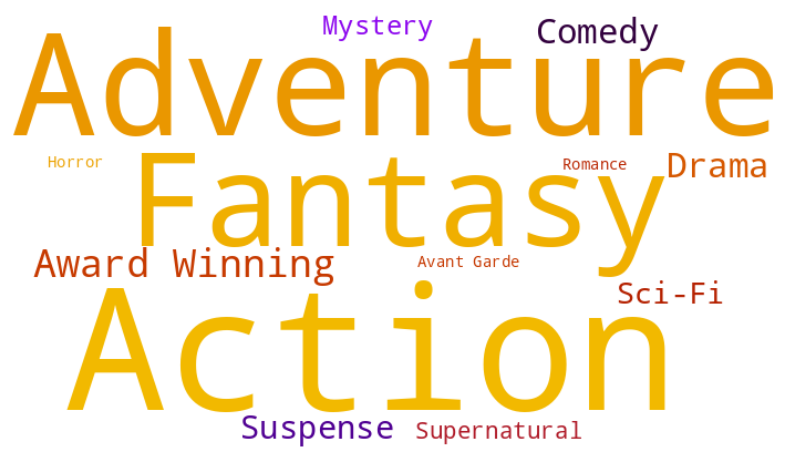

,Name,Genres
1,Death Note,"Supernatural, Suspense"
2,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy"
3,One Punch Man,"Action, Comedy"
6,Boku no Hero Academia,Action
8,Shingeki no Kyojin Season 2,"Action, Drama, Suspense"


In [ ]:
# Get user preferences for the random user
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
pd.DataFrame(user_pref).head(5)


In [ ]:
def get_recommended_animes(similar_users, user_pref, n=10):
    recommended_animes = []
    anime_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id))
        if not pref_list.empty:  # Check if user has watched any animes
            pref_list = pref_list[~pref_list["Name"].isin(user_pref["Name"].values)]
            anime_list.append(pref_list.Name.values)

    if len(anime_list) == 0:
        print("No anime recommendations available for the given users.")
        return pd.DataFrame()

    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    # Count the occurrences of each anime in the entire dataset
    anime_count = df_score['anime_id'].value_counts()

    for i, anime_name in enumerate(sorted_list.index):
        if isinstance(anime_name, str):
            try:
                anime_id = df_anime[df_anime.Name == anime_name].anime_id.values[0]
                english_name = df_anime[df_anime['Name'] == anime_name]['English name'].values[0]
                name = english_name if english_name != "UNKNOWN" else anime_name
                genre = df_anime[df_anime.Name == anime_name].Genres.values[0]
                Synopsis = df_anime[df_anime.Name == anime_name].Synopsis.values[0]
                n_user_pref = anime_count.get(anime_id, 0)  # Get the total count of users who have watched this anime
                recommended_animes.append({
                    "n": n_user_pref,
                    "anime_name": anime_name,
                    "Genres": genre,
                    "Synopsis": Synopsis
                })
            except:
                pass
    return pd.DataFrame(recommended_animes)

In [ ]:
# Get recommended animes for the random user
recommended_animes = get_recommended_animes(similar_users, user_pref, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes


> Top recommendations for user: 337022


,n,anime_name,Genres,Synopsis
0,96950,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence.\n\nLelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
1,82329,Code Geass: Hangyaku no Lelouch R2,"Action, Award Winning, Drama, Sci-Fi","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. \n\nLelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
2,49713,Byousoku 5 Centimeter,"Drama, Romance","What happens when two people love each other but just aren't meant to be together? Takaki Toono and Akari Shinohara are childhood friends, but circumstances beyond their control tear them apart. They promise to stay in contact, and although the progression of time widens the distance between them, the chain of memories remains ever-present.\n\nByousoku 5 Centimeter is a romantic drama that focuses on the mundane and harsh reality of long-distance relationships. Stuck in the past and unable to make any new memories, Takaki and Akari cling to the hope of seeing each other again. They live their everyday lives half-heartedly, both hurting themselves and the people around them."
3,43605,Baccano!,"Action, Comedy, Mystery, Supernatural","During the early 1930s in Chicago, the transcontinental train, Flying Pussyfoot, is starting its legendary journey that will leave a trail of blood all over the country. At the same time in New York, the ambitious scientist Szilard and his unwilling aide Ennis are looking for missing bottles of the immortality elixir. In addition, a war between the mafia groups is getting worse. On board the Advena Avis, in 1711, alchemists are about to learn the price of immortality.\n\nBased on the award-winning light novels of the same name, Baccano! follows several events that initially seem unrelated, both in time and place, but are part of a much bigger story—one of alchemy, survival, and immortality. Merging these events together are the kindhearted would-be thieves, Isaac and Miria, connecting various people, all of them with their own hidden ambitions and agendas, and creating lifelong bonds and consequences for everyone involved."
4,93001,Fullmetal Alchemist,"Action, Adventure, Award Winning, Drama, Fantasy","Edward Elric, a young, brilliant alchemist, has lost much in his twelve-year life: when he and his brother Alphonse try to resurrect their dead mother through the forbidden act of human transmutation, Edward loses his brother as well as two of his limbs. With his supreme alchemy skills, Edward binds Alphonse's soul to a large suit of armor.\n\nA y

***Content based recommendation***

In [ ]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Define a generator to compute TF-IDF matrix on the fly
tfidf_matrix_generator = tfidf.fit_transform((genre for genre in df_anime['Genres'].values.astype('U')))

# Compute cosine similarity matrix as a sparse matrix
cosine_sim_sparse = linear_kernel(tfidf_matrix_generator, tfidf_matrix_generator)

In [ ]:
# Function to get recommendations based on cosine similarity, genre, and ratings based on score
def get_recommendations(title, cosine_sim, df):
    idx = df_anime[df_anime['Name'] == title].index[0]

    # Compute the similarity scores between the anime at the given index and all other animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter out animes with unknown scores
    valid_scores = [x for x in sim_scores if df_anime.iloc[x[0]]['Score'] != "UNKNOWN"]

    # Sort the valid anime similarity scores based on the cosine similarity and ratings score in descending order
    sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)

    # Get the top 10 similar animes (excluding the anime itself)
    top_animes = [x for x in sorted_scores if x[0] != idx][:10]

    # Extract the indices of the recommended animes
    recommended_indices = [idx for idx, _ in top_animes]
    recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres', 'Score']]
    return recommended_animes

In [ ]:
# Example usage: Get recommendations for an anime
anime_title = 'Naruto'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "Naruto":


,Name,Genres,Score
414,Bleach: Sennen Kessen-hen,"Action, Adventure, Fantasy",9.07
9,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04
28,One Piece,"Action, Adventure, Fantasy",8.69
333,Hunter x Hunter,"Action, Adventure, Fantasy",8.41
16,Naruto: Shippuuden,"Action, Adventure, Fantasy",8.26
945,Jigokuraku,"Action, Adventure, Fantasy",8.26
1063,Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka IV: Fuka Shou - Yakusai-hen,"Action, Adventure, Fantasy",8.24
190,Magi: The Kingdom of Magic,"Action, Adventure, Fantasy",8.22
854,One Piece Movie 14: Stampede,"Action, Adventure, Fantasy",8.22
375,Dragon Ball Super: Broly,"Action, Adventure, Fantasy",8.16


In [ ]:
model.save('my_model')